# Flight Data Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

pd.set_option("display.max_columns", 500)
plt.style.use("seaborn-colorblind")
pal = sns.color_palette()

<ipython-input-7-b680f444d1b3>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


## Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

link = f'https://drive.google.com/uc?id=1StfOm_hCyVhyrvRhUCH5npVDY63hg766'
df = pd.read_csv(link)

## Data Cleaning

In [ ]:
df.shape

(456153, 23)

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,FlightDate,Airline,Flight_Number_Marketing_Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes
0,0,0,4/4/2022,"Commutair Aka Champlain Enterprises, Inc.",4301,GJT,DEN,False,False,1133,1123.0,0.0,11921,"Grand Junction, CO",Colorado,11292,"Denver, CO",Colorado,17.0,8.0,1245,1228.0,0.0
1,64,64,4/4/2022,"GoJet Airlines, LLC d/b/a United Express",4183,DCA,EWR,False,False,1600,1600.0,0.0,11278,"Washington, DC",Virginia,11618,"Newark, NJ",New Jersey,18.0,7.0,1744,1702.0,0.0
2,128,128,4/4/2022,Air Wisconsin Airlines Corp,3908,ORD,TVC,False,False,1820,1810.0,0.0,13930,"Chicago, IL",Illinois,15380,"Traverse City, MI",Michigan,13.0,3.0,2034,2012.0,0.0
3,192,192,4/4/2022,Air Wisconsin Airlines Corp,3812,CID,ORD,False,False,1110,1103.0,0.0,11003,"Cedar Rapids/Iowa City, IA",Iowa,13930,"Chicago, IL",Illinois,9.0,10.0,1234,1204.0,0.0
4,256,256,4/4/2022,Air Wisconsin Airlines Corp,3744,ORD,SGF,False,False,851,856.0,5.0,13930,"Chicago, IL",Illinois,14783,"Springfield, MO",Missouri,21.0,6.0,1039,1038.0,0.0


In [ ]:
df["Airline"]

0         Commutair Aka Champlain Enterprises, Inc.
1          GoJet Airlines, LLC d/b/a United Express
2                       Air Wisconsin Airlines Corp
3                       Air Wisconsin Airlines Corp
4                       Air Wisconsin Airlines Corp
                            ...                    
456148                     ExpressJet Airlines Inc.
456149                     ExpressJet Airlines Inc.
456150                     ExpressJet Airlines Inc.
456151                     ExpressJet Airlines Inc.
456152                     ExpressJet Airlines Inc.
Name: Airline, Length: 456153, dtype: object

In [ ]:
df.dtypes

Unnamed: 0.1                         int64
Unnamed: 0                           int64
FlightDate                          object
Airline                             object
Flight_Number_Marketing_Airline      int64
Origin                              object
Dest                                object
Cancelled                             bool
Diverted                              bool
CRSDepTime                           int64
DepTime                            float64
DepDelayMinutes                    float64
OriginAirportID                      int64
OriginCityName                      object
OriginStateName                     object
DestAirportID                        int64
DestCityName                        object
DestStateName                       object
TaxiOut                            float64
TaxiIn                             float64
CRSArrTime                           int64
ArrTime                            float64
ArrDelayMinutes                    float64
dtype: obje

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456153 entries, 0 to 456152
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0.1                     456153 non-null  int64  
 1   Unnamed: 0                       456153 non-null  int64  
 2   FlightDate                       456153 non-null  object 
 3   Airline                          456153 non-null  object 
 4   Flight_Number_Marketing_Airline  456153 non-null  int64  
 5   Origin                           456153 non-null  object 
 6   Dest                             456153 non-null  object 
 7   Cancelled                        456153 non-null  bool   
 8   Diverted                         456153 non-null  bool   
 9   CRSDepTime                       456153 non-null  int64  
 10  DepTime                          444190 non-null  float64
 11  DepDelayMinutes                  444164 non-null  float64
 12  Or

In [ ]:
cat_cols = ["Airline", "Origin", "Dest", "OriginStateName", "DestStateName"]
for c in cat_cols:
    df[c] = df[c].astype("category")

#### Converting variables with very less unique values to a categorical type in pandas, saves a lot of memory and makes processing efficient. As you can see, our dataset goes from 4.4 GB to 3.5 GB by doing this simples transformation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456153 entries, 0 to 456152
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   Unnamed: 0.1                     456153 non-null  int64   
 1   Unnamed: 0                       456153 non-null  int64   
 2   FlightDate                       456153 non-null  object  
 3   Airline                          456153 non-null  category
 4   Flight_Number_Marketing_Airline  456153 non-null  int64   
 5   Origin                           456153 non-null  category
 6   Dest                             456153 non-null  category
 7   Cancelled                        456153 non-null  bool    
 8   Diverted                         456153 non-null  bool    
 9   CRSDepTime                       456153 non-null  int64   
 10  DepTime                          444190 non-null  float64 
 11  DepDelayMinutes                  444164 non-null  fl

In [ ]:
#usually used to convert strings containing dates and time into date-time objects to help with time based operations and analysis.
df['FlightDate']=pd.to_datetime(df['FlightDate'])

## Visualizations

#### We can see here that most flights have a 1 minute or lower delay, meaning majority of the flights are actuallty either OnTime or Early

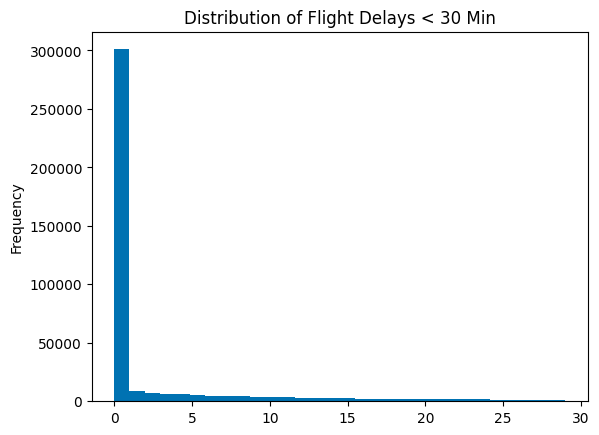

In [ ]:
#creating a subset of df where delay < 30 mins ans assigning to vis1
vis1=df.query("DepDelayMinutes < 30")["DepDelayMinutes"]
vis1.plot(
    kind="hist", bins=30, title="Distribution of Flight Delays < 30 Min"
)
plt.show()

### Note: 0 and 1 minute delays have been removed for the next visualization as a delay of 1 minute is far more common and can't be considered as a delay

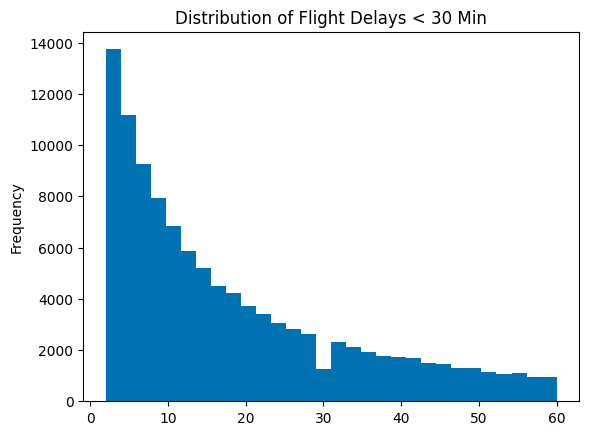

In [ ]:
#creating a subset of df where 1 < delay < 61 mins ans assigning to vis2
vis2=df.query("DepDelayMinutes > 1 and DepDelayMinutes < 61")["DepDelayMinutes"]
vis2.plot(
     kind = "hist", bins=30, title="Distribution of Flight Delays < 30 Min"
)
plt.show()

#### Just this simple histogram of delays shows us quite a lot of interesting things.
- Firstly, like all things in nature, flight delays also follow a smooth normal distribution curve
- Secondly, there is an abdrupt dip in the number of flights having a delay of 30 mins, this may be due to the fact that Airlines are often known to publish 30 mins delays as a 29 mins delay so that it is perceived as a smaller number by the general audience.

## Grouping of Delays
Per Wikipedia https://en.wikipedia.org/wiki/Flight_cancellation_and_delay:

- Delays are divided into three categories, namely "on time or small delay" (up to 15 minutes delay), "Medium delay" (15 – 45 minutes delay) and "Large delay" ( 45 minutes delay).

In [ ]:
#creating a new column and filling it with null values
df["DelayGroup"] = None

#row in depdelayminutes<1, fill with ontime early in delaygroup
df.loc[df["DepDelayMinutes"] <= 1, "DelayGroup"] = "OnTime_Early"

#row in depdelayminutes between 1 and equal to 15, fill with small delay in delaygroup
df.loc[
    (df["DepDelayMinutes"] > 1) & (df["DepDelayMinutes"] <= 15), "DelayGroup"
] = "Small_Delay"

df.loc[
    (df["DepDelayMinutes"] > 15) & (df["DepDelayMinutes"] <= 45), "DelayGroup"
] = "Medium_Delay"

df.loc[df["DepDelayMinutes"] > 45, "DelayGroup"] = "Large_Delay"

df.loc[df["Cancelled"], "DelayGroup"] = "Cancelled"

df.head(10)

,Unnamed: 0.1,Unnamed: 0,FlightDate,Airline,Flight_Number_Marketing_Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes,DelayGroup
0,0,0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",4301,GJT,DEN,False,False,1133,1123.0,0.0,11921,"Grand Junction, CO",Colorado,11292,"Denver, CO",Colorado,17.0,8.0,1245,1228.0,0.0,OnTime_Early
1,64,64,2022-04-04,"GoJet Airlines, LLC d/b/a United Express",4183,DCA,EWR,False,False,1600,1600.0,0.0,11278,"Washington, DC",Virginia,11618,"Newark, NJ",New Jersey,18.0,7.0,1744,1702.0,0.0,OnTime_Early
2,128,128,2022-04-04,Air Wisconsin Airlines Corp,3908,ORD,TVC,False,False,1820,1810.0,0.0,13930,"Chicago, IL",Illinois,15380,"Traverse City, MI",Michigan,13.0,3.0,2034,2012.0,0.0,OnTime_Early
3,192,192,2022-04-04,Air Wisconsin Airlines Corp,3812,CID,ORD,False,False,1110,1103.0,0.0,11003,"Cedar Rapids/Iowa City, IA",Iowa,13930,"Chicago, IL",Illinois,9.0,10.0,1234,1204.0,0.0,OnTime_Early
4,256,256,2022-04-04,Air Wisconsin Airlines Corp,3744,ORD,SGF,False,False,851,856.0,5.0,13930,"Chicago, IL",Illinois,14783,"Springfield, MO",Missouri,21.0,6.0,1039,1038.0,0.0,Small_Delay
5,320,320,2022-04-03,"Commutair Aka Champlain Enterprises, Inc.",4878,LNK,DEN,False,False,927,921.0,0.0,13029,"Lincoln, NE",Nebraska,11292,"Denver, CO",Colorado,22.0,10.0,1007,1007.0,0.0,OnTime_Early
6,384,384,2022-04-03,"GoJet Airlines, LLC d/b/a United Express",4508,STL,EWR,False,False,1000,1000.0,0.0,15016,"St. Louis, MO",Missouri,11618,"Newark, NJ",New Jersey,20.0,6.0,1329,1323.0,0.0,OnTime_Early
7,448,448,2022-04-03,"GoJet Airlines, LLC d/b/a United Express",4402,ITH,EWR,False,False,700,654.0,0.0,12397,"Ithaca/Cortland, NY",New York,11618,"Newark, NJ",New Jersey,9.0,8.0,824,745.0,0.0,OnTime_Early
8,512,512,2022-04-03,"Commutair Aka Champlain Enterprises, Inc.",4317,IAH,JAN,False,False,1435,1430.0,0.0,12266,"Houston, TX",Texas,12448,"Jackson/Vicksburg, MS",Mississippi,19.0,4.0,1559,1546.0,0.0,OnTime_Early
9,576,576,2022-04-03,"Commutair Aka Champlain Enterprises, Inc.",4238,ABQ,IAH,False,False,1215,1303.0,48.0,10140,"Albuquerque, NM",New Mexico,12266,"Houston, TX",Texas,13.0,11.0,1531,1601.0,30.0,Large_Delay


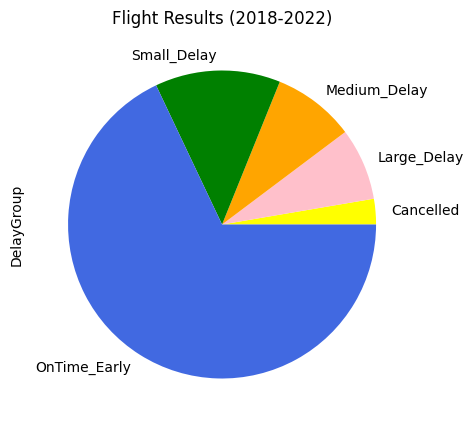

In [ ]:
#counting the number of flights in each delay group by .value_counts() and also setting the ascending order format as true
vis3=df["DelayGroup"].value_counts(ascending=True)
vis3.plot(
  kind="pie", figsize=(10, 5), title="Flight Results (2018-2022)",colors=["yellow", "pink", "orange", "green", "royalblue"]
)
plt.show()

- #### Like the normal distribution we saw previously, we can see here that majority of the flights are OnTime or Early (<=1 minute delay) followed by flights with a Small Delay (<15 minutes delay)

## Flights Per Year

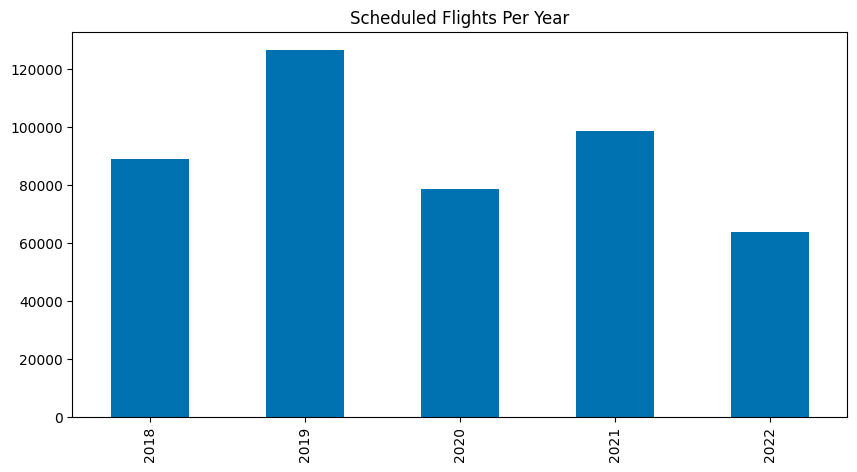

In [ ]:
#creating a new column called year and filling it with the year from the FlightDate column using the dt.year accessor as we converted FlightDate to date-time object earlier
df["Year"] = df['FlightDate'].dt.year
#counting the unique values of years and putting them in ascending order
df["Year"].value_counts().sort_index().plot(
    kind="bar", figsize=(10, 5), title="Scheduled Flights Per Year"
)
plt.show()

- #### We see here that as the economy of the US advanced from 2018 to 2019, the number of flights increased. 2018 in the US also saw severe winters as well Hurricane Florence leading to lower flights than 2019.
- #### As the COVID-19 pandemic hit the world in 2020, we see a sharp decrease in the number of flights of 2020.
- #### As the world recovered from the COVID-19 pandemic in 2021, we see an increase in  the number of flights.
- #### Taken data source is only till July of 2022 and hence the lower number of flights in the visualization.

## Results by Year

In [ ]:
#creating a new column called year and filling it with the year from the FlightDate column using the dt.year accessor as we converted FlightDate to date-time object earlier
df["Year"] = df["FlightDate"].dt.year

#we are grouping df by year and delay group
#value_counts(normalize=True) gives the percentage of each unique delay group within each year
#unstack converts year into index and delay group into columns
#*100 to convert decimal to percentage
df_agg = df.groupby("Year")["DelayGroup"].value_counts(normalize=True).unstack() * 100

#giving order in which we want the columns
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Greens")

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Year,,,,,
2018,66.290896,14.262409,9.522524,8.319833,1.604338
2019,66.635029,13.612060,9.076025,8.731967,1.944919
2020,77.619624,8.187321,4.518637,3.696719,5.977700
2021,68.027742,13.921702,9.003985,7.258956,1.787615
2022,60.889147,15.675413,10.989580,9.475237,2.970623


- #### Analysing the Flight Cancellations by year, we can see that 2020 saw an astronomically high 6% flight cancellation due to the COVID-19 pandemic.
- #### Interestingly, 2020 was also the year with the most percentage of Flights being OnTime/Early. This may be due to the dramatically reduced Air Traffic in 2020.

## Results by Month

In [ ]:
#creating a new column called month and filling it with the month from the FlightDate column using the dt.month accessor as we converted FlightDate to date-time object earlier
df["Month"] = df["FlightDate"].dt.month

#.value_counts(normalize = true) gives the percentage of unique delay groups within a month
#unstack will make the month column as index and the delay group column as the columns
df_agg = df.groupby("Month")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Blues")

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Month,,,,,
1,70.024657,12.070274,7.833468,7.036844,3.034757
2,66.714898,13.175353,9.077507,7.879003,3.153239
3,68.422620,11.990106,7.739172,6.209203,5.638900
4,66.649005,12.179245,7.741024,6.721671,6.709056
5,66.868270,14.309349,9.061322,7.800168,1.960891
6,61.717905,15.033646,10.885341,10.492149,1.870959
7,64.072796,14.421316,9.925062,9.820388,1.760438
8,66.801492,13.012048,9.041882,8.961561,2.183018
9,74.878458,11.228151,6.609561,5.813752,1.470078


- #### We see here that the Summer months of May to August in the US, have a high percentage of flights delayed. This may be due to the following reasons:
    1. May through August is the peak summer travel season in the US, and this period can bring more severe weather conditions, such as thunderstorms and hurricanes, which can cause flight delays.
    2. The summer months also tend to see higher passenger volume, which can lead to congestion at airports, longer security lines, and longer boarding times which may in turn lead to delayed flights
    3. Airlines may perform more maintenance and repairs on their planes during the quieter fall and winter months, which can reduce the risk of unexpected maintenance issues causing delays.

- #### We can also see that the months of September to November in the US see a higher percentage of flights that are OnTime/Early, this may be because of the following reasons:
    1. In September through November, the weather tends to be more favorable across much of the US, with fewer storms and milder temperatures, which can lead to more on-time or early flights.
    2. The months of September through November also see a reduced amount of travellers as the holiday season is over and its mostly an off season for the travel industry in general.
    
- #### Another observation we make is that March and April seem to have an astronomically high percentage of cancellations, apart from some weather conditions there doesn't seem to be a reason for this abnormality on the surface.

- #### BUT, if we think deeper, March and April were the months when the COVID-19 disease was officially announced as a pandemic, lockdowns were put in place and restrictions were applied on travel, back in 2020.

- #### So to check if our hypothesis is correct, let us do the same plot but without the year 2020 this time around.

## Exclude 2020

In [ ]:
df["Month"] = df["FlightDate"].dt.month
df_agg = (
    df.query("Year != 2020")                  #creates subset w/o 2020 year info
    .groupby("Month")["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()
    * 100
)
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Blues")

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Month,,,,,
1,69.096274,11.934583,8.051606,7.345324,3.572213
2,64.295542,13.795411,9.764623,8.266092,3.878333
3,68.195578,13.732685,8.999174,7.192001,1.880561
4,68.546304,13.625678,8.654265,7.513713,1.660040
5,65.374280,15.083419,9.638270,8.341946,1.562085
6,59.099684,15.786241,11.700012,11.389961,2.024102
7,60.607064,15.711921,10.885762,10.894040,1.901214
8,62.747084,14.262765,10.253545,10.295453,2.441154
9,72.641542,11.981756,7.383149,6.433250,1.560303


- #### Now that the year 2020 has been removed, we see the high amount of cancellations in March/April that we saw in the previous vizz are no longer visible. Thus our hypothesis was correct.

## Why High Cancellation in March/April? What does it look like by year for these months?

In [ ]:
df["Month"] = df["FlightDate"].dt.month
df_agg = (
    df.query("3 <= Month <= 4")
    .groupby("Year")["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()
    * 100
)
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Oranges", axis=0)

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Year,,,,,
2018,66.471042,14.610039,9.722008,7.382239,1.814672
2019,68.066950,13.323904,8.359264,8.052805,2.197077
2020,64.261807,5.429528,3.235403,2.689971,24.383290
2021,78.605916,10.962258,5.691942,3.801428,0.938456
2022,61.858431,15.610823,11.238043,9.390544,1.902159


- #### This graph further strenghtens our previous hypothesis. Here we have filtered the stats for only March and April throughout the years and we can see that there were high amount of cancellations in the March and April months of 2020 presumably due to the COVID-19 pandemic.

## Visualizing using CalPlot

In [ ]:
!pip install calmap

Text(0.5, 0.92, 'US Flight Cancellations')

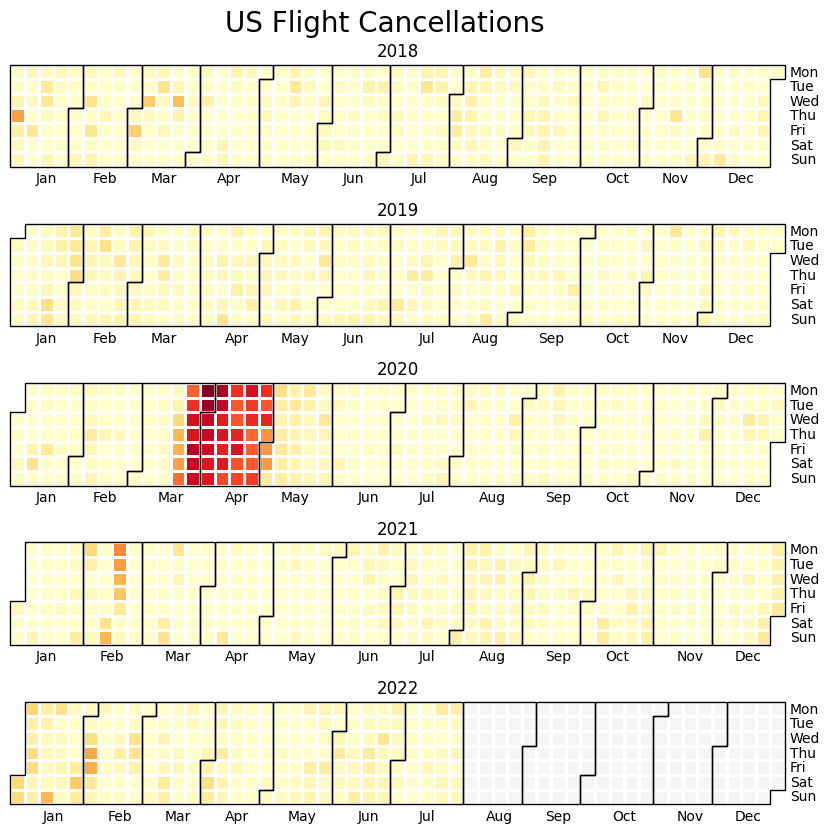

In [ ]:
import calmap                                                                   #stands for calendar heatmap
events = df.groupby("FlightDate")["Cancelled"].mean()                           #gives the avg daily cancellations
fig, axs = plt.subplots(5, 1, figsize=(10, 10))                                 # 5rows 1column
for i, year in enumerate([2018, 2019, 2020, 2021, 2022]):                       #
    calmap.yearplot(
        events, year=year, cmap="YlOrRd", monthly_border=True, ax=axs[i]
    )
    axs[i].set_title(year)
fig.patch.set_facecolor("white")
fig.suptitle("US Flight Cancellations", y=0.92, fontsize=20)

#### We now do a Calendar Plot to visualise the Flight cancellations throight the year.
- #### We can see that from the middle of March to the end of April of 2020, flight cancellation numbers have skyrocketed, this is because of the airlines cancelling flights due to the COVID-19 pandemic.

## Compare Airlines
- Who has the most delays?
- Who has the most cancellations?
- Who is the most reliable? (on time)

<Figure size 2000x2000 with 0 Axes>

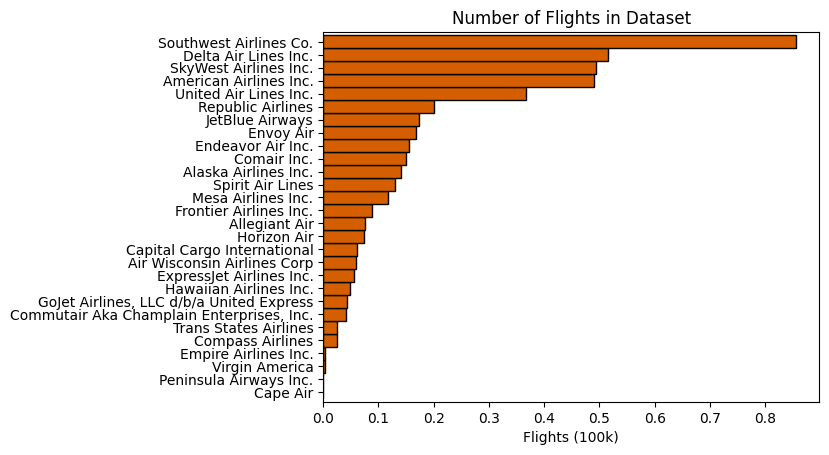

<Figure size 2000x2000 with 0 Axes>

In [ ]:
airlines_ordered = (df["Airline"].value_counts(ascending=True) / 100000).plot(
    kind="barh", color=pal[2], width=1, edgecolor="black"
)
plt.title("Number of Flights in Dataset")
plt.xlabel("Flights (100k)")
plt.figure(figsize=(20,20))

- #### Here we can see that Southwest Airlines had the most number of airlines followed by Delta, SkyWest, American and United Airlines.
- #### On the other end of the spectrum, Airlines like Empire Airlines, Virgin America, Peninsula Airways And Cape Air had little to no flights in the US from 2018 to 2022.

## Subset to the Top Airlines
- ##### Minimum 10000 Flights
- ##### We will now analyse the top airlines (with more than a million flights) from 2018-2022

In [ ]:
df["Airline"].value_counts().reset_index().query("Airline > 10000")["index"].values.tolist()

['Southwest Airlines Co.',
 'Delta Air Lines Inc.',
 'SkyWest Airlines Inc.',
 'American Airlines Inc.',
 'United Air Lines Inc.',
 'Republic Airlines',
 'JetBlue Airways',
 'Envoy Air',
 'Endeavor Air Inc.',
 'Comair Inc.',
 'Alaska Airlines Inc.',
 'Spirit Air Lines',
 'Mesa Airlines Inc.']

In [ ]:
top_airlines = (
    df["Airline"]
    .value_counts()
    .reset_index()
    .query("Airline > 10000")["index"]
    .values.tolist()
)

df_top = df.loc[df["Airline"].isin(top_airlines)].reset_index(drop=True).copy()

In [ ]:
# Reset airline categories
df_top["Airline"] = df_top["Airline"].astype("str").astype("category")

In [ ]:
df_top

,Unnamed: 0.1,Unnamed: 0,FlightDate,Airline,Flight_Number_Marketing_Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes,DelayGroup,Year,Month
0,1856,1856,2022-04-01,Southwest Airlines Co.,1057,ATL,AUS,False,False,1440,1505.0,25.0,10397,"Atlanta, GA",Georgia,10423,"Austin, TX",Texas,11.0,7.0,1615,1632.0,17.0,Medium_Delay,2022,4
1,1920,1920,2022-04-01,Southwest Airlines Co.,1024,ATL,OMA,False,False,1250,1303.0,13.0,10397,"Atlanta, GA",Georgia,13871,"Omaha, NE",Nebraska,13.0,4.0,1415,1415.0,0.0,Small_Delay,2022,4
2,1984,1984,2022-04-01,Southwest Airlines Co.,1113,AUS,HOU,False,False,640,701.0,21.0,10423,"Austin, TX",Texas,12191,"Houston, TX",Texas,8.0,3.0,735,744.0,9.0,Medium_Delay,2022,4
3,2048,2048,2022-04-01,Southwest Airlines Co.,269,BDL,DEN,False,False,730,726.0,0.0,10529,"Hartford, CT",Connecticut,11292,"Denver, CO",Colorado,15.0,4.0,1000,934.0,0.0,OnTime_Early,2022,4
4,2112,2112,2022-04-01,Southwest Airlines Co.,1629,BNA,LAS,False,False,1455,1458.0,3.0,10693,"Nashville, TN",Tennessee,12889,"Las Vegas, NV",Nevada,13.0,5.0,1705,1651.0,0.0,Small_Delay,2022,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395739,29180480,29180480,2019-01-30,Mesa Airlines Inc.,6285,IAD,CLE,False,False,2200,2240.0,40.0,12264,"Washington, DC",Virginia,11042,"Cleveland, OH",Ohio,32.0,9.0,2322,17.0,55.0,Medium_Delay,2019,1
395740,29180544,29180544,2019-01-01,Mesa Airlines Inc.,6334,IAD,LGA,False,False,1705,1702.0,0.0,12264,"Washington, DC",Virginia,12953,"New York, NY",New York,21.0,7.0,1848,1809.0,0.0,OnTime_Early,2019,1
395741,29180608,29180608,2019-01-27,Mesa Airlines Inc.,6242,DAY,IAH,False,False,630,630.0,0.0,11267,"Dayton, OH",Ohio,12266,"Houston, TX",Texas,42.0,7.0,830,838.0,8.0,OnTime_Early,2019,1
395742,29180672,29180672,2019-01-08,Mesa Airlines Inc.,6260,LGA,IAD,False,False,1020,1012.0,0.0,12953,"New York, NY",New York,12264,"Washington, DC",Virginia,31.0,5.0,1149,1136.0,0.0,OnTime_Early,2019,1


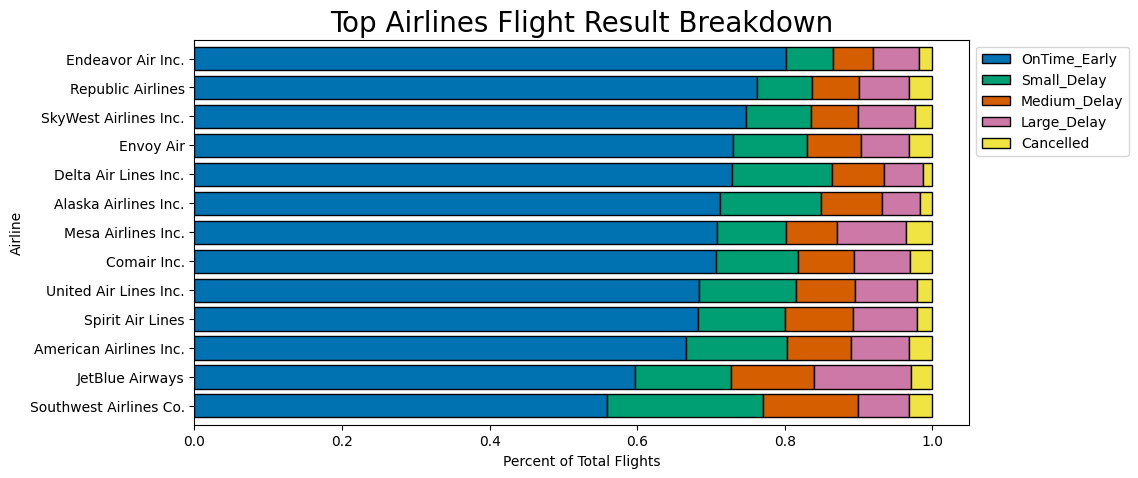

In [ ]:
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]

df_agg = (
    df_top.groupby(["Airline"])["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()[col_order]
)

fig, ax = plt.subplots(figsize=(10, 5))
df_agg.sort_values("OnTime_Early").plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airlines Flight Result Breakdown", fontsize=20)
ax.set_xlabel("Percent of Total Flights")
plt.show()

In [ ]:
delay_mapping = {
    "OnTime_Early": "Good",
    "Small_Delay": "Good",
    "Medium_Delay": "Bad",
    "Large_Delay": "Bad",
    "Cancelled": "Bad",
}

In [ ]:
df_top["DelayOk"] = df_top["DelayGroup"].map(delay_mapping)

- ##### Envoy Air along with Southwest and American Airlines seem to have the most cancelled flights.
- ##### Jetblue has a considerably high percentage of Large Delays with a high percentage of cancelled flights as well with a comparatively lower percentage of flights being OnTime/Early.
- ##### Delta Airlines has the least number of cancellations, least number of Large and Medium Delays with a high percentage of flights being OnTime/Early.
- ##### Hence, we can say that Delta Airlines is the most reliable airlines and Jetblue is the least reliable.

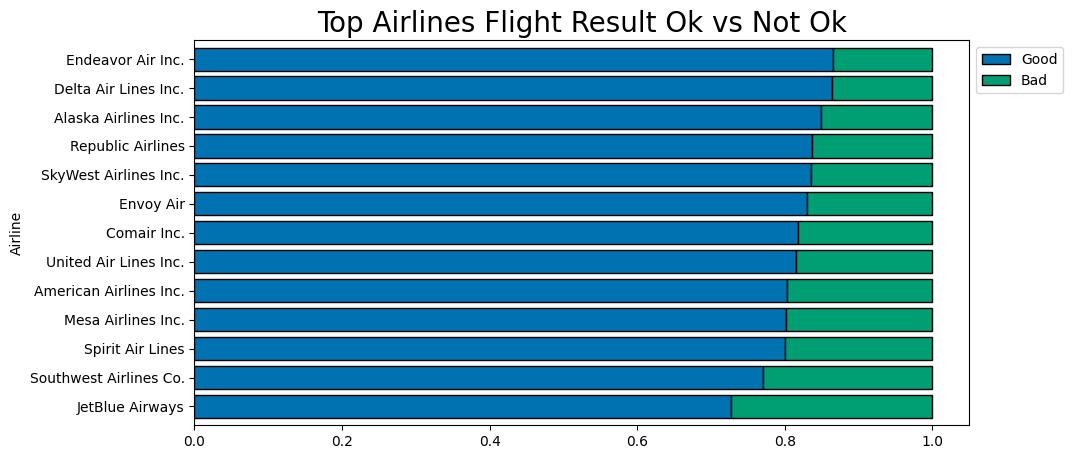

In [ ]:
df_agg = (
    df_top.groupby(["Airline"])["DelayOk"]
    .value_counts(normalize=True)
    .unstack()[["Good", "Bad"]]
)

fig, ax = plt.subplots(figsize=(10, 5))
df_agg.sort_values("Good").plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airlines Flight Result Ok vs Not Ok", fontsize=20)

plt.show()

- ##### Above visualization summarises our findings at a higher level of abstraction.

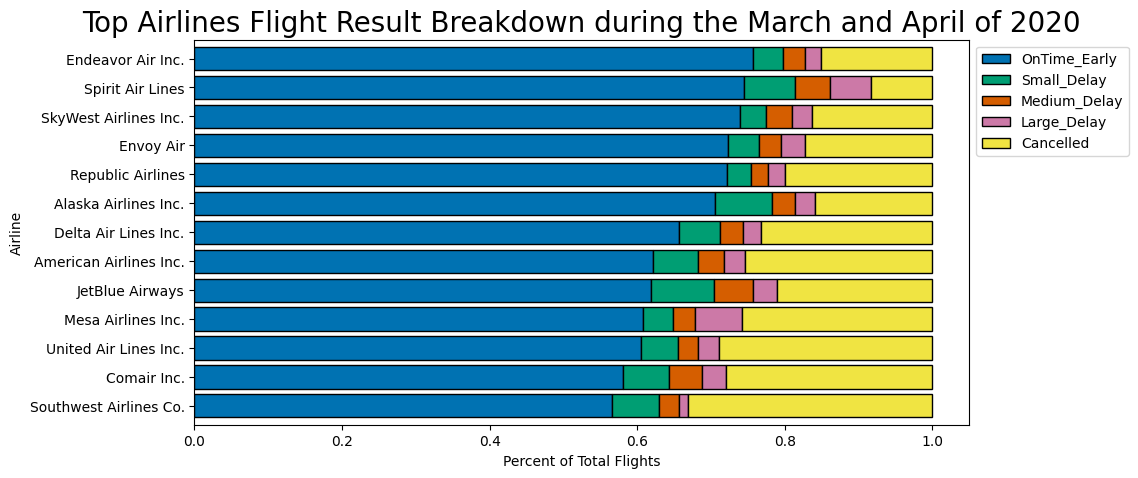

In [ ]:
df_v=df_top[df_top['Year']==2020]
df_vizz=df_v.query("3 <= Month <= 4")

col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]

df_agg = (
    df_vizz.groupby(["Airline"])["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()[col_order]
)

fig, ax = plt.subplots(figsize=(10, 5))
df_agg.sort_values("OnTime_Early").plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airlines Flight Result Breakdown during the March and April of 2020", fontsize=20)
ax.set_xlabel("Percent of Total Flights")
plt.show()

#### This is an analysis of Flights during the March-April months of 2020 when the world was hit with the COVID-19 pandemic and many flights were cancelled.
- ##### Southwest Airlines had the highest percentage of flights been canclled and the lowest pecentage of OnTime/Early flights.
- ##### On the other hand, SkyWest has the least percentage of flights cancelled and the highest pecentage of OnTime/Early flights.
- ##### So SkyWest was the most reliable airline during the March-April months of 2020 and Southwest was the least reliable in the same period.

## Compare Airports
- ##### Which cities have the busiest airports?
- ##### Which cities have the most reliable airports?
- ##### Which cities have the airports with the highest cancellation percentage?

In [ ]:
city_counts = df['OriginCityName'].value_counts().reset_index()
city_counts.columns = ['OriginCityName', 'Count']

city_counts

,OriginCityName,Count
0,"Chicago, IL",26631
1,"Atlanta, GA",21392
2,"Denver, CO",18182
3,"Dallas/Fort Worth, TX",17217
4,"New York, NY",14967
...,...,...
375,"Bishop, CA",4
376,"Wilmington, DE",3
377,"Rota, TT",1
378,"Cold Bay, AK",1


#### This is an analysis of the flight delays and cancellations at some of the busiest airports in the US.
- ##### We can see here that Newark and New York have the highest amount of flight cancellations and comparatively lower OnTime/Early flights, this may be because they are some of the busiest.
- ##### Salt Lake City, Utah along with Minneapolis has some of the least percentage of cancelled flights and one of the highest percentage of flights that are OnTime/Early.
- ##### This makes Salt Lake City and Minneapolis Internation Airports the most reliable in the US with New York and Newark International Airports being the least reliable.

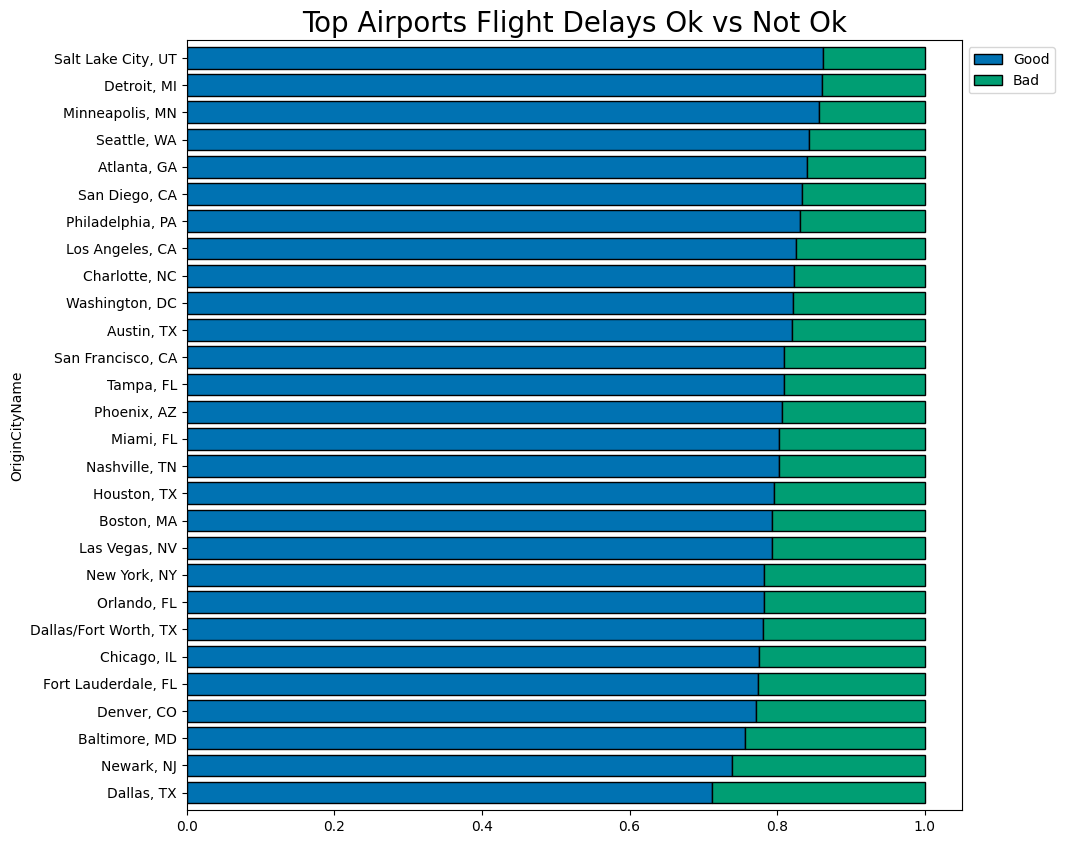

In [ ]:
city_counts = df_top['OriginCityName'].value_counts().reset_index()
city_counts.columns = ['OriginCityName', 'Count']

df_new=pd.merge(df_top, city_counts, on='OriginCityName')


df_agg = (
    df_new.query("Count>=4000")
    .groupby(["OriginCityName"])["DelayOk"]
    .value_counts(normalize=True)
    .unstack()[["Good", "Bad"]]
)

fig, ax = plt.subplots(figsize=(10, 10))
df_agg.sort_values("Good").plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airports Flight Delays Ok vs Not Ok", fontsize=20)

plt.show()

- ##### Above visualization summarises our findings at a higher level of abstraction.

# Data Transformation for Machine Learning

In [ ]:
df_top['OriginCityName'].nunique()

349

In [ ]:
df_top['DestCityName'].nunique()

350

In [ ]:
df["DelayOk"] = df["DelayGroup"].map(delay_mapping)

In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,FlightDate,Airline,Flight_Number_Marketing_Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes,DelayGroup,Year,Month,DelayOk
0,0,0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",4301,GJT,DEN,False,False,1133,1123.0,0.0,11921,"Grand Junction, CO",Colorado,11292,"Denver, CO",Colorado,17.0,8.0,1245,1228.0,0.0,OnTime_Early,2022,4,Good
1,64,64,2022-04-04,"GoJet Airlines, LLC d/b/a United Express",4183,DCA,EWR,False,False,1600,1600.0,0.0,11278,"Washington, DC",Virginia,11618,"Newark, NJ",New Jersey,18.0,7.0,1744,1702.0,0.0,OnTime_Early,2022,4,Good
2,128,128,2022-04-04,Air Wisconsin Airlines Corp,3908,ORD,TVC,False,False,1820,1810.0,0.0,13930,"Chicago, IL",Illinois,15380,"Traverse City, MI",Michigan,13.0,3.0,2034,2012.0,0.0,OnTime_Early,2022,4,Good
3,192,192,2022-04-04,Air Wisconsin Airlines Corp,3812,CID,ORD,False,False,1110,1103.0,0.0,11003,"Cedar Rapids/Iowa City, IA",Iowa,13930,"Chicago, IL",Illinois,9.0,10.0,1234,1204.0,0.0,OnTime_Early,2022,4,Good
4,256,256,2022-04-04,Air Wisconsin Airlines Corp,3744,ORD,SGF,False,False,851,856.0,5.0,13930,"Chicago, IL",Illinois,14783,"Springfield, MO",Missouri,21.0,6.0,1039,1038.0,0.0,Small_Delay,2022,4,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456148,29193472,29193472,2019-01-10,ExpressJet Airlines Inc.,4241,DCA,EWR,False,False,750,743.0,0.0,11278,"Washington, DC",Virginia,11618,"Newark, NJ",New Jersey,15.0,8.0,909,852.0,0.0,OnTime_Early,2019,1,Good
456149,29193536,29193536,2019-01-11,ExpressJet Airlines Inc.,4242,IAH,STL,True,False,1829,NaN,NaN,12266,"Houston, TX",Texas,15016,"St. Louis, MO",Missouri,NaN,NaN,2035,NaN,NaN,Cancelled,2019,1,Bad
456150,29193600,29193600,2019-01-04,ExpressJet Airlines Inc.,4245,ORD,BNA,False,False,1530,1527.0,0.0,13930,"Chicago, IL",Illinois,10693,"Nashville, TN",Tennessee,16.0,18.0,1712,1701.0,0.0,OnTime_Early,2019,1,Good
456151,29193664,29193664,2019-01-18,ExpressJet Airlines Inc.,4247,ORD,DSM,False,False,1010,1059.0,49.0,13930,"Chicago, IL",Illinois,11423,"Des Moines, IA",Iowa,18.0,4.0,1138,1218.0,40.0,Large_Delay,2019,1,Bad


## Label Encoding:

---

Label encoding is a technique used in machine learning and data analysis to convert categorical variables into numerical format.

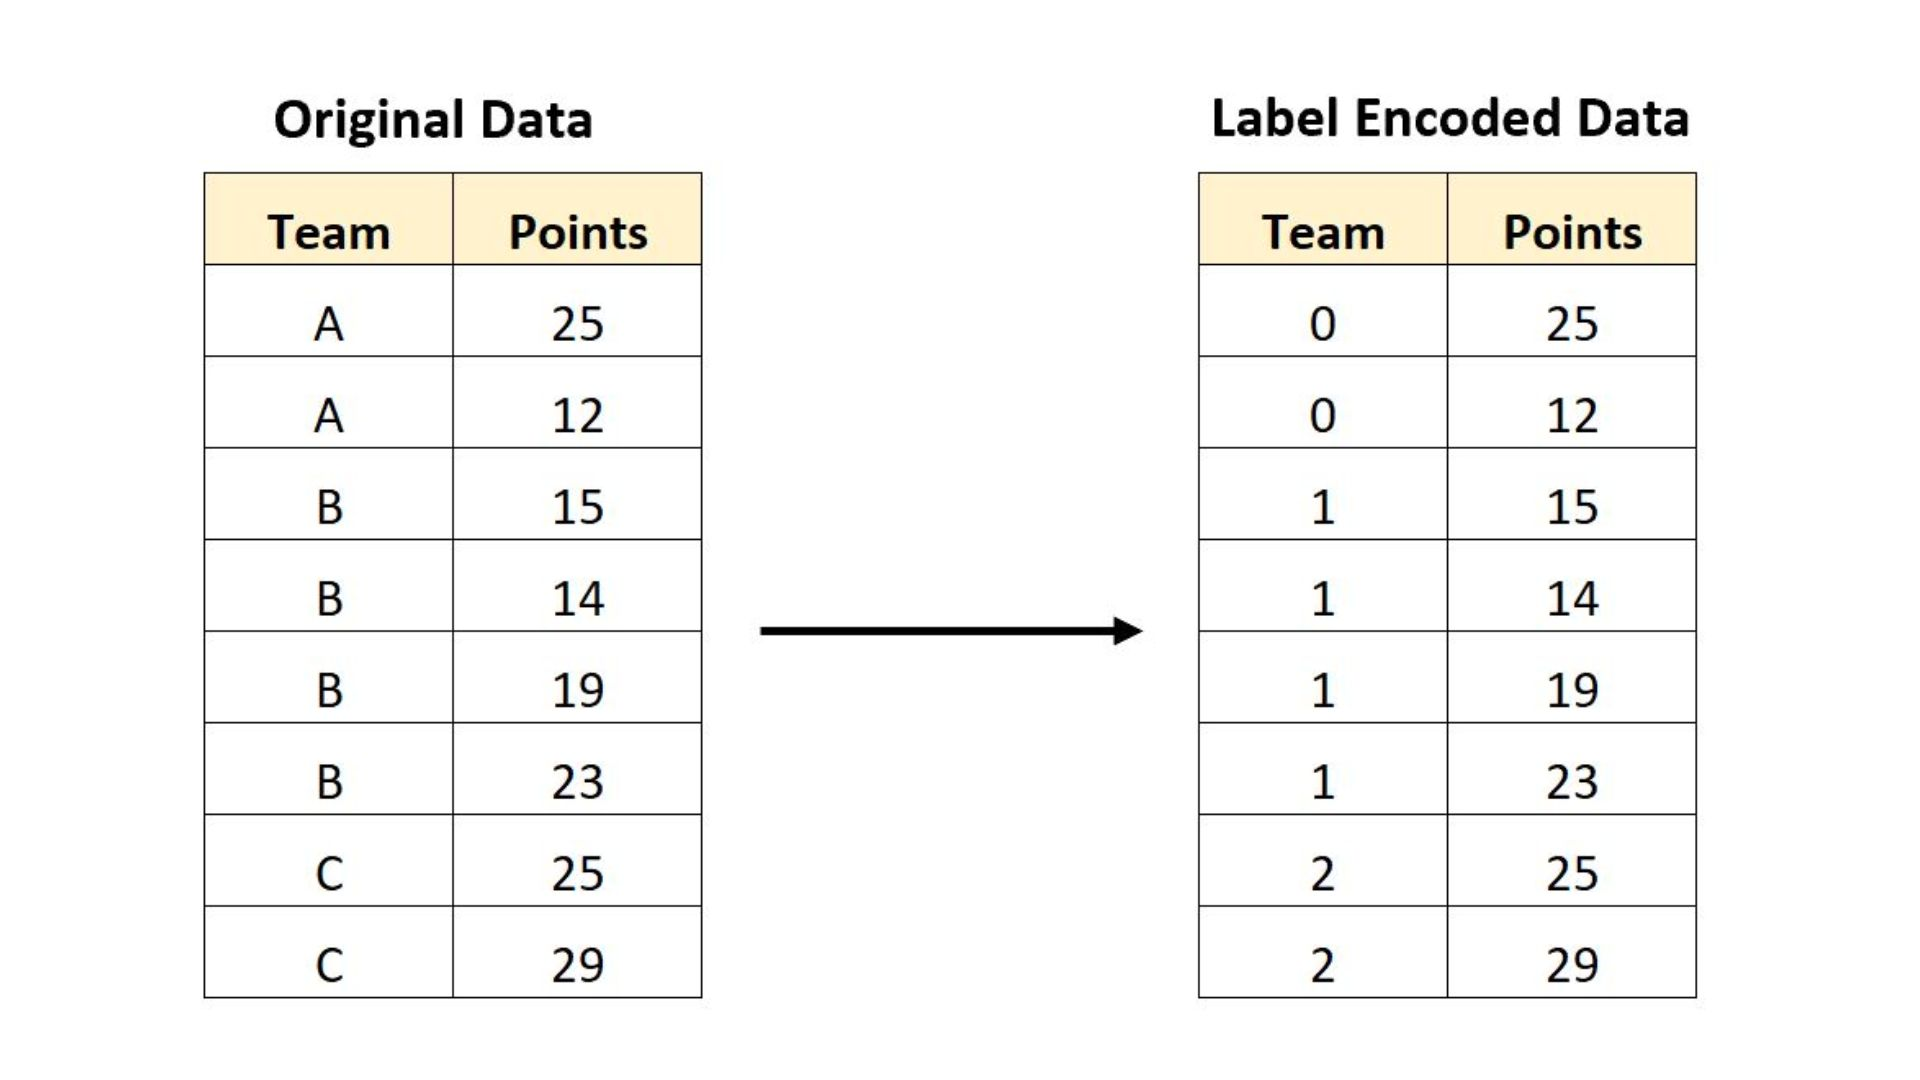

## One Hot Encoding:

---
One Hot Encoding can be defined as a process of transforming categorical variables into numerical format before fitting and training a Machine Learning algorithm.

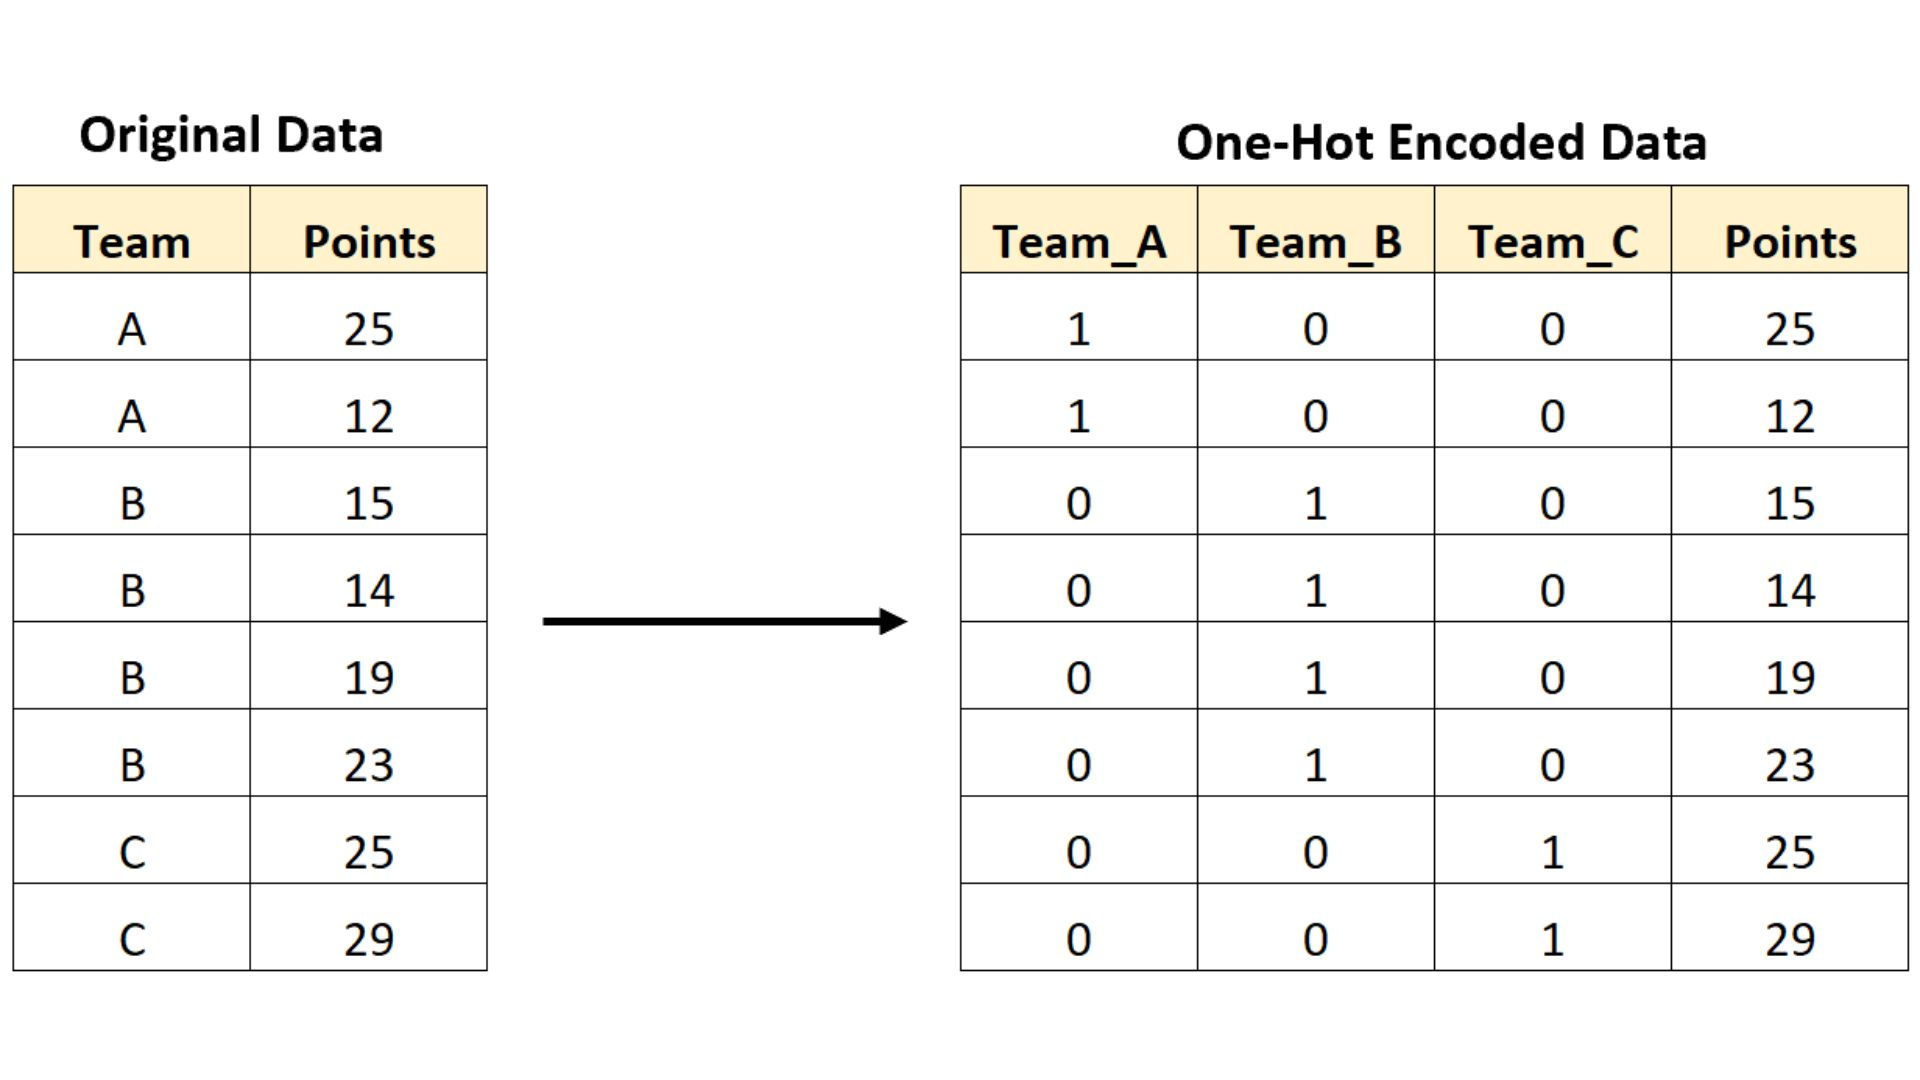

In [ ]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
df['Airline']=le1.fit_transform(df['Airline'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le2=LabelEncoder()
df['Origin']=le2.fit_transform(df['Origin'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le3=LabelEncoder()
df['Dest']=le3.fit_transform(df['Dest'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le4=LabelEncoder()
df['Cancelled']=le4.fit_transform(df['Cancelled'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le5=LabelEncoder()
df['Diverted']=le5.fit_transform(df['Diverted'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le6=LabelEncoder()
df['OriginCityName']=le6.fit_transform(df['OriginCityName'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le7=LabelEncoder()
df['DestCityName']=le7.fit_transform(df['DestCityName'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le8=LabelEncoder()
df['OriginStateName']=le8.fit_transform(df['OriginStateName'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le9=LabelEncoder()
df['DestStateName']=le9.fit_transform(df['DestStateName'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le10=LabelEncoder()
df['DelayGroup']=le10.fit_transform(df['DelayGroup'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le11=LabelEncoder()
df['DelayOk']=le11.fit_transform(df['DelayOk'])

In [ ]:
df.isnull().sum()

Unnamed: 0.1                           0
Unnamed: 0                             0
FlightDate                             0
Airline                                0
Flight_Number_Marketing_Airline        0
Origin                                 0
Dest                                   0
Cancelled                              0
Diverted                               0
CRSDepTime                             0
DepTime                            11963
DepDelayMinutes                    11989
OriginAirportID                        0
OriginCityName                         0
OriginStateName                        0
DestAirportID                          0
DestCityName                           0
DestStateName                          0
TaxiOut                            12279
TaxiIn                             12479
CRSArrTime                             0
ArrTime                            12367
ArrDelayMinutes                    13282
DelayGroup                             0
Year            

In [ ]:
df.dropna(inplace=True)

In [ ]:
# df_new=df[df['Year']==2022]

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,FlightDate,Airline,Flight_Number_Marketing_Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes,DelayGroup,Year,Month,DelayOk
0,0,0,2022-04-04,7,4301,144,98,0,0,1133,1123.0,0.0,11921,129,5,11292,89,5,17.0,8.0,1245,1228.0,0.0,3,2022,4,1
1,64,64,2022-04-04,15,4183,96,123,0,0,1600,1600.0,0.0,11278,361,48,11618,243,29,18.0,7.0,1744,1702.0,0.0,3,2022,4,1
2,128,128,2022-04-04,0,3908,265,368,0,0,1820,1810.0,0.0,13930,65,12,15380,348,21,13.0,3.0,2034,2012.0,0.0,3,2022,4,1
3,192,192,2022-04-04,0,3812,72,264,0,0,1110,1103.0,0.0,11003,56,14,13930,65,12,9.0,10.0,1234,1204.0,0.0,3,2022,4,1
4,256,256,2022-04-04,0,3744,265,332,0,0,851,856.0,5.0,13930,65,12,14783,333,24,21.0,6.0,1039,1038.0,0.0,4,2022,4,1


In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'FlightDate', 'Airline',
       'Flight_Number_Marketing_Airline', 'Origin', 'Dest', 'Cancelled',
       'Diverted', 'CRSDepTime', 'DepTime', 'DepDelayMinutes',
       'OriginAirportID', 'OriginCityName', 'OriginStateName', 'DestAirportID',
       'DestCityName', 'DestStateName', 'TaxiOut', 'TaxiIn', 'CRSArrTime',
       'ArrTime', 'ArrDelayMinutes', 'DelayGroup', 'Year', 'Month', 'DelayOk'],
      dtype='object')

In [ ]:
df.iloc[2:10,0:3]

,Unnamed: 0.1,Unnamed: 0,FlightDate
2,128,128,2022-04-04
3,192,192,2022-04-04
4,256,256,2022-04-04
5,320,320,2022-04-03
6,384,384,2022-04-03
7,448,448,2022-04-03
8,512,512,2022-04-03
9,576,576,2022-04-03


# Machine Learning Model Goal:
#### We now aim to create a machine learning model that has the ability to tell if a Flight will be delayed or not just by seeing the flight information like route, airlines and designated Timings etc.
#### The main motive of this model is to predict with a reasonable certainity if a flight will be delayed or not so that if someone wishes to book a connecting flight, they don't actually end up missing the connecting flight or if they have meetings planned later, they can schedule things accordingly.
#### Since this is an imbalanced dataset, we will use Ensemble Learning methods mainly, we can also try DecisionTree for good measure.

## **Machine Learning Model:-**

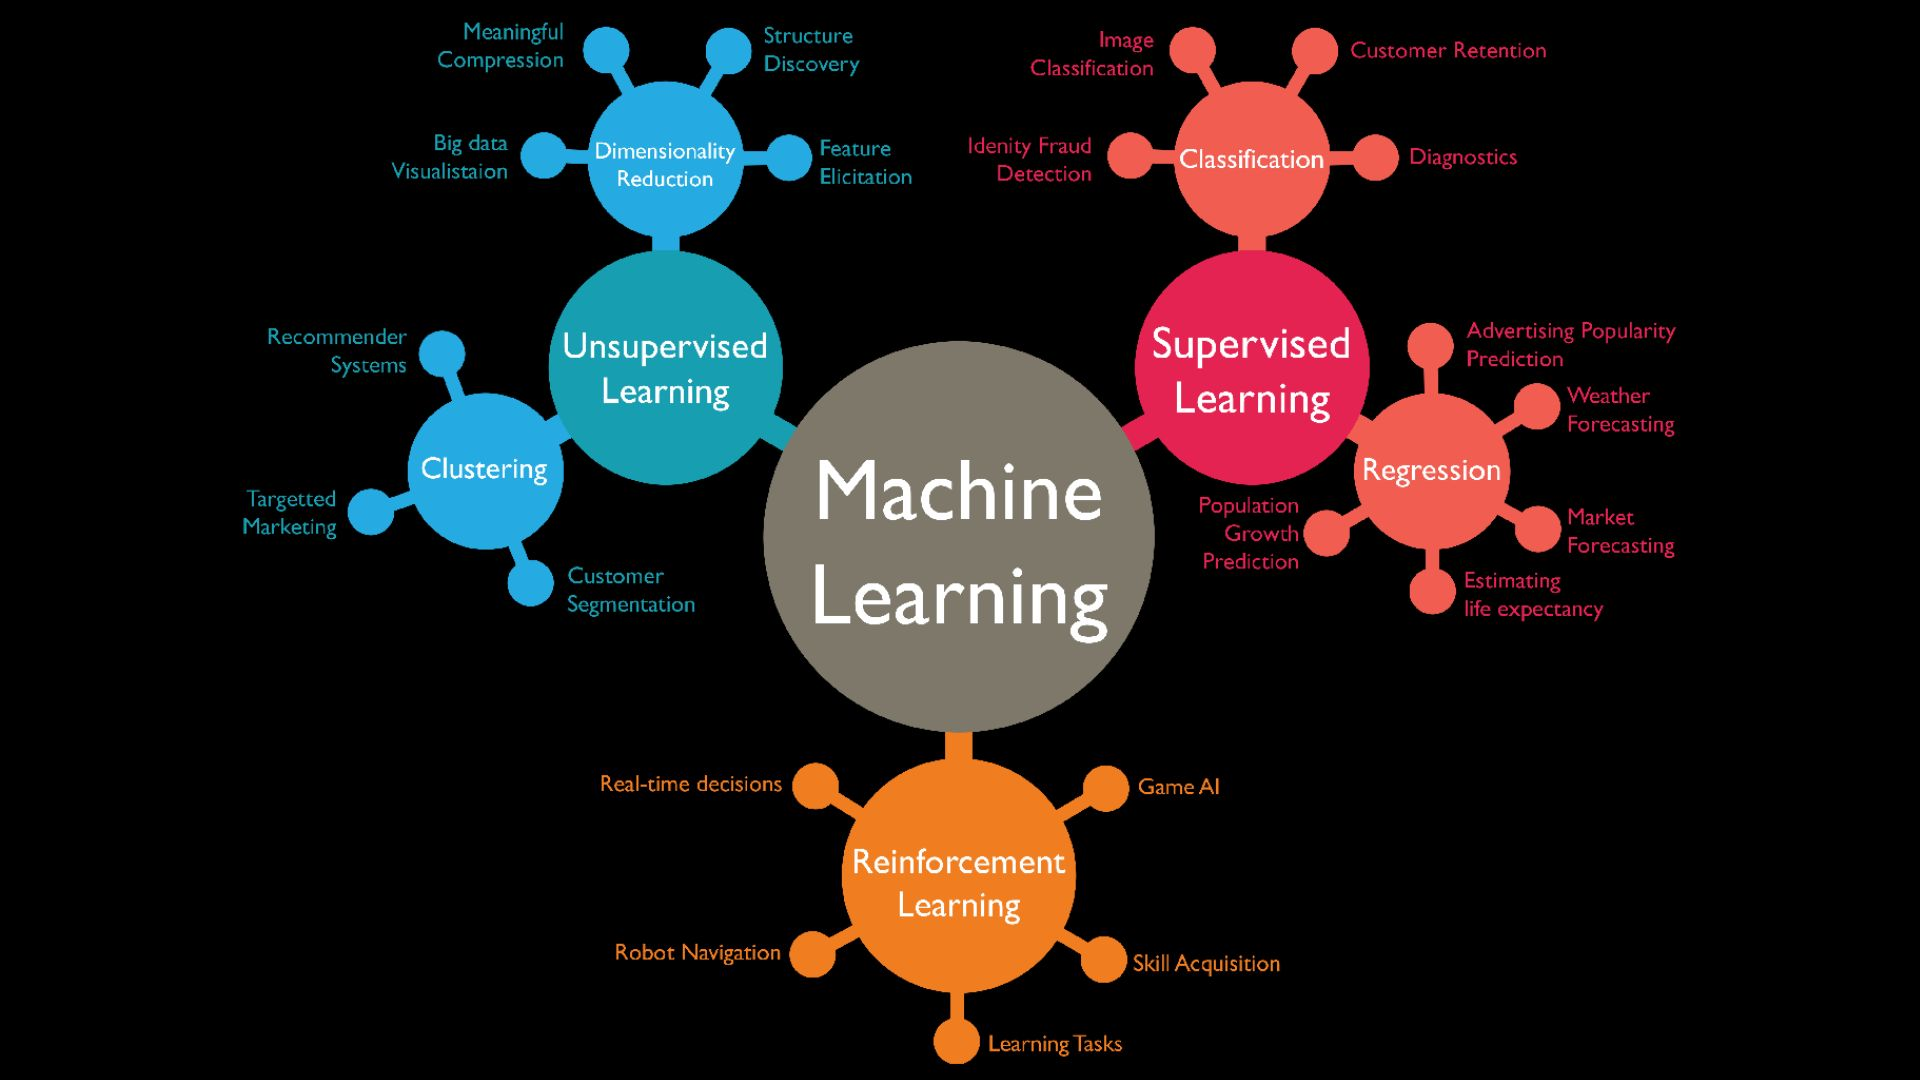

## Supervised learning

---


### It is the most common type of machine learning. It is used when you have labeled data, meaning that you know the desired output for each input.


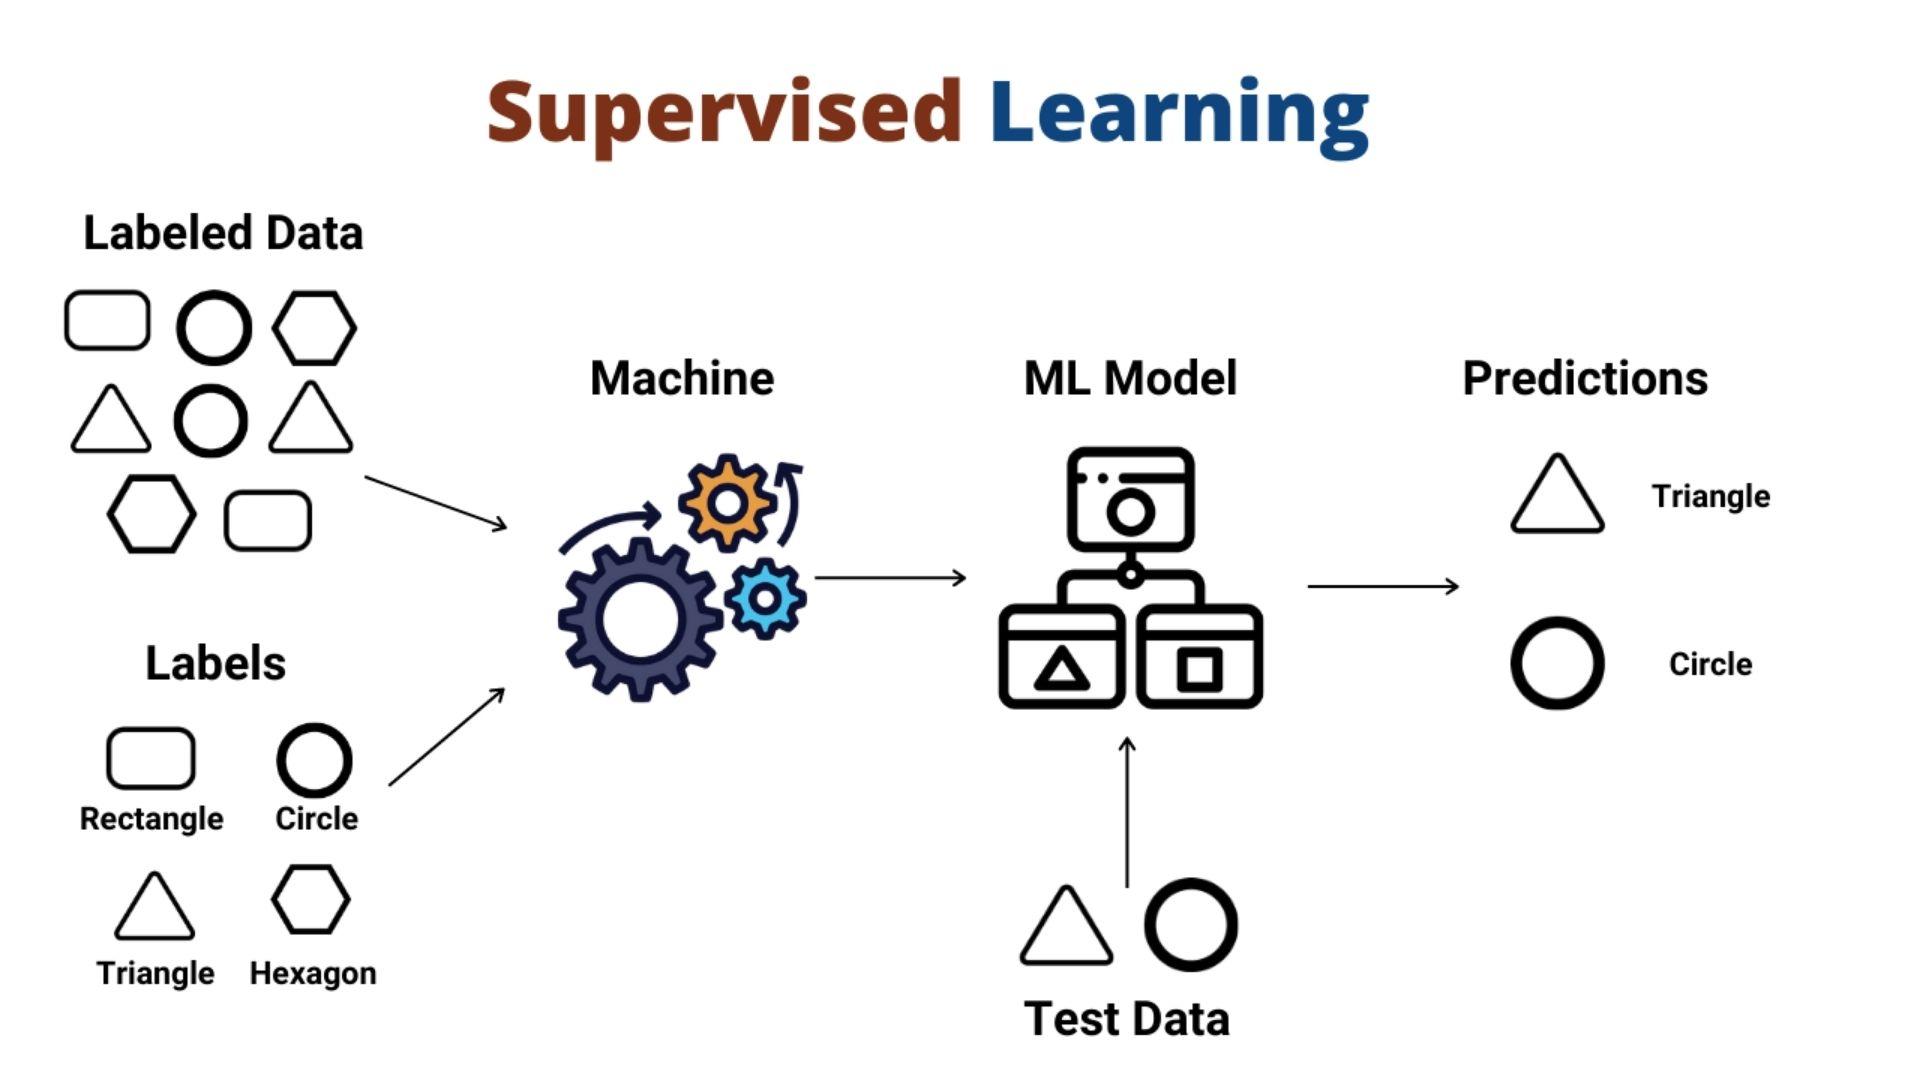

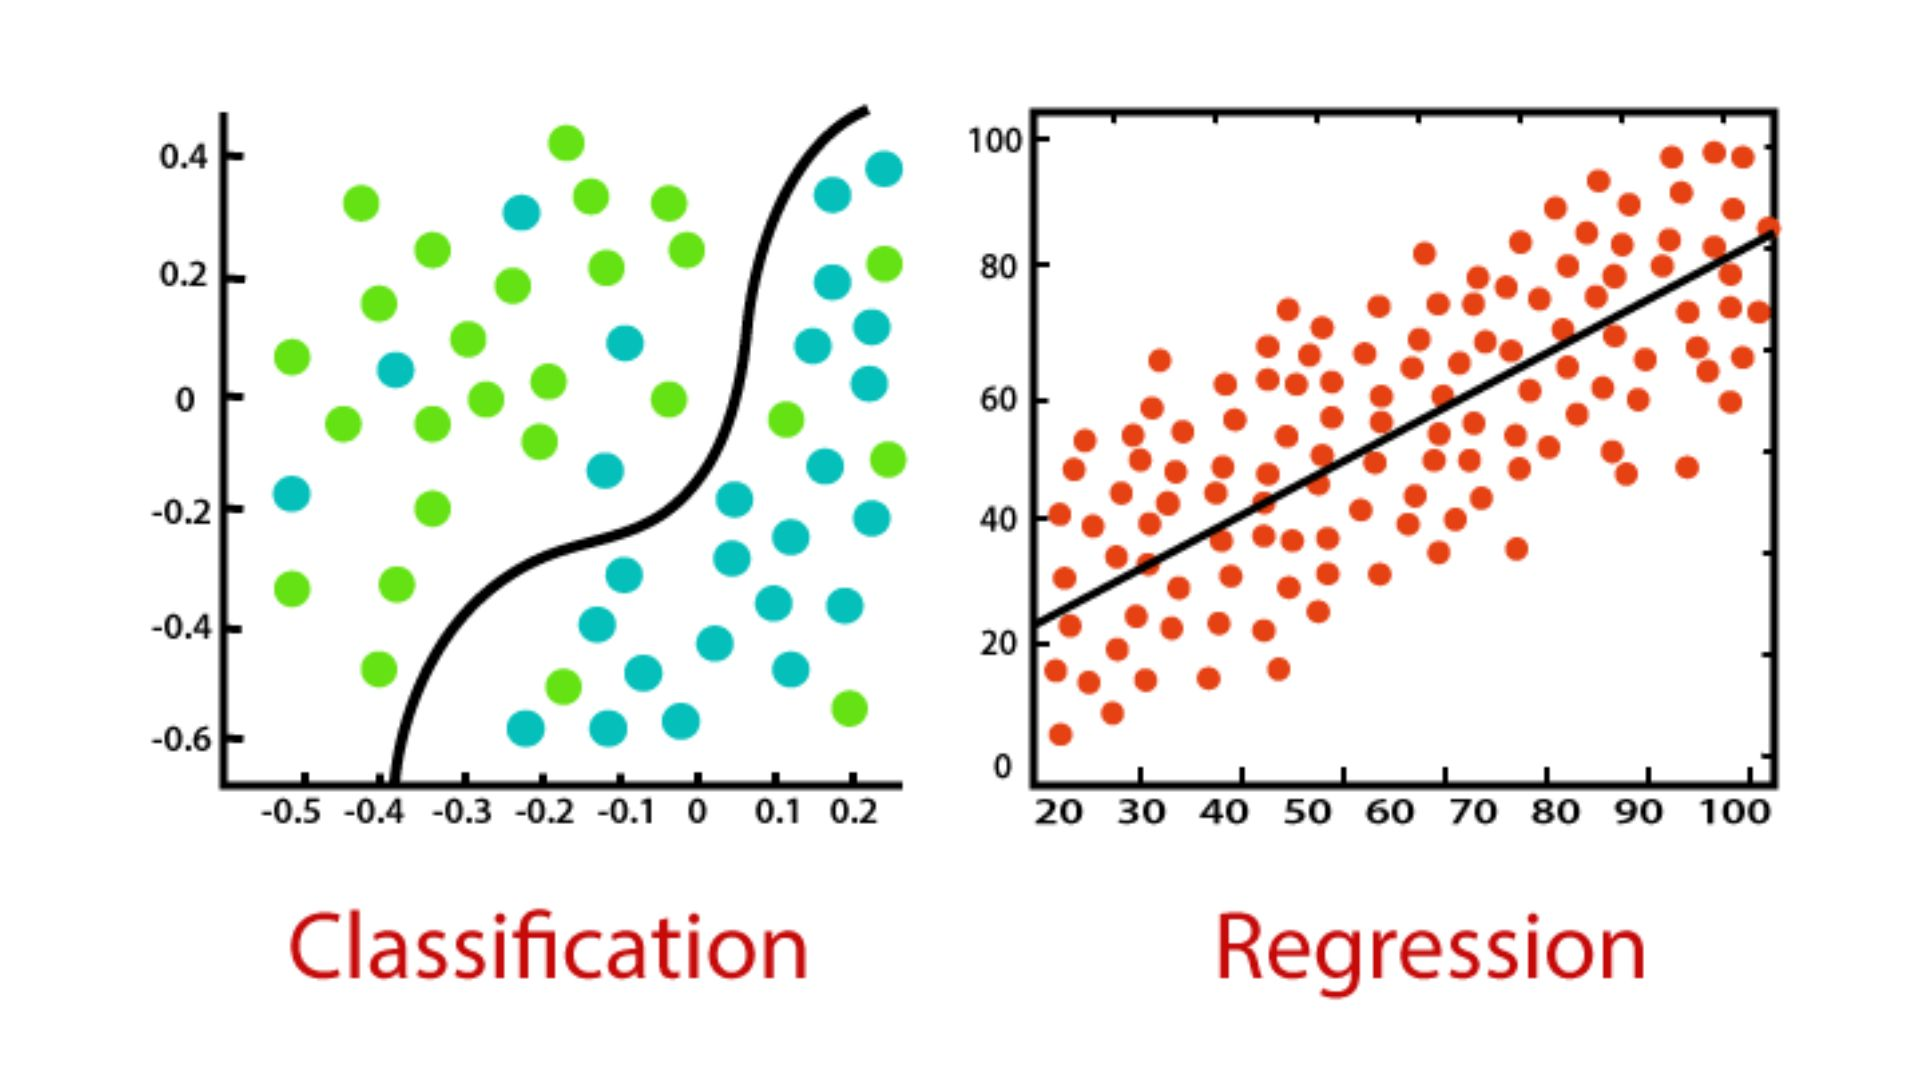

## Unsupervised learning

---


### It is used when you do not have labeled data. The model learns to find patterns in the data without being explicitly told what to look for.


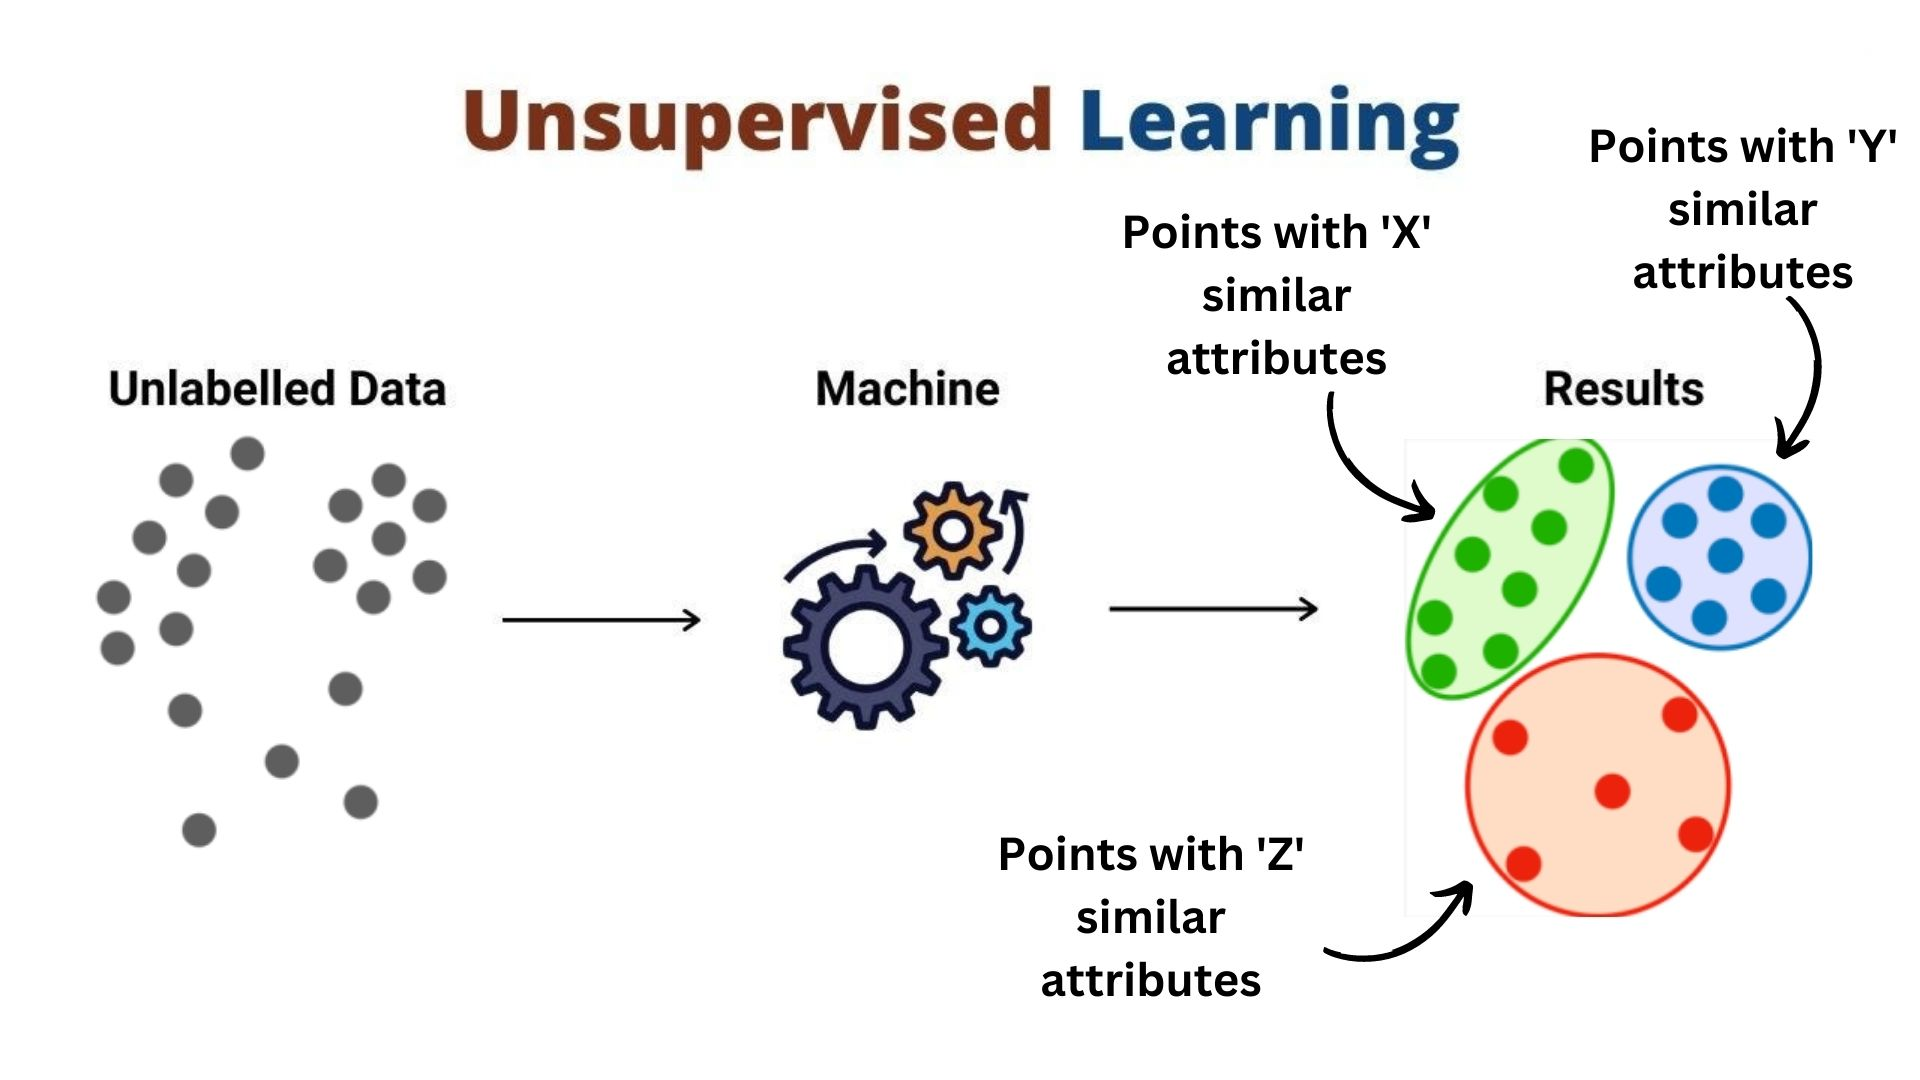

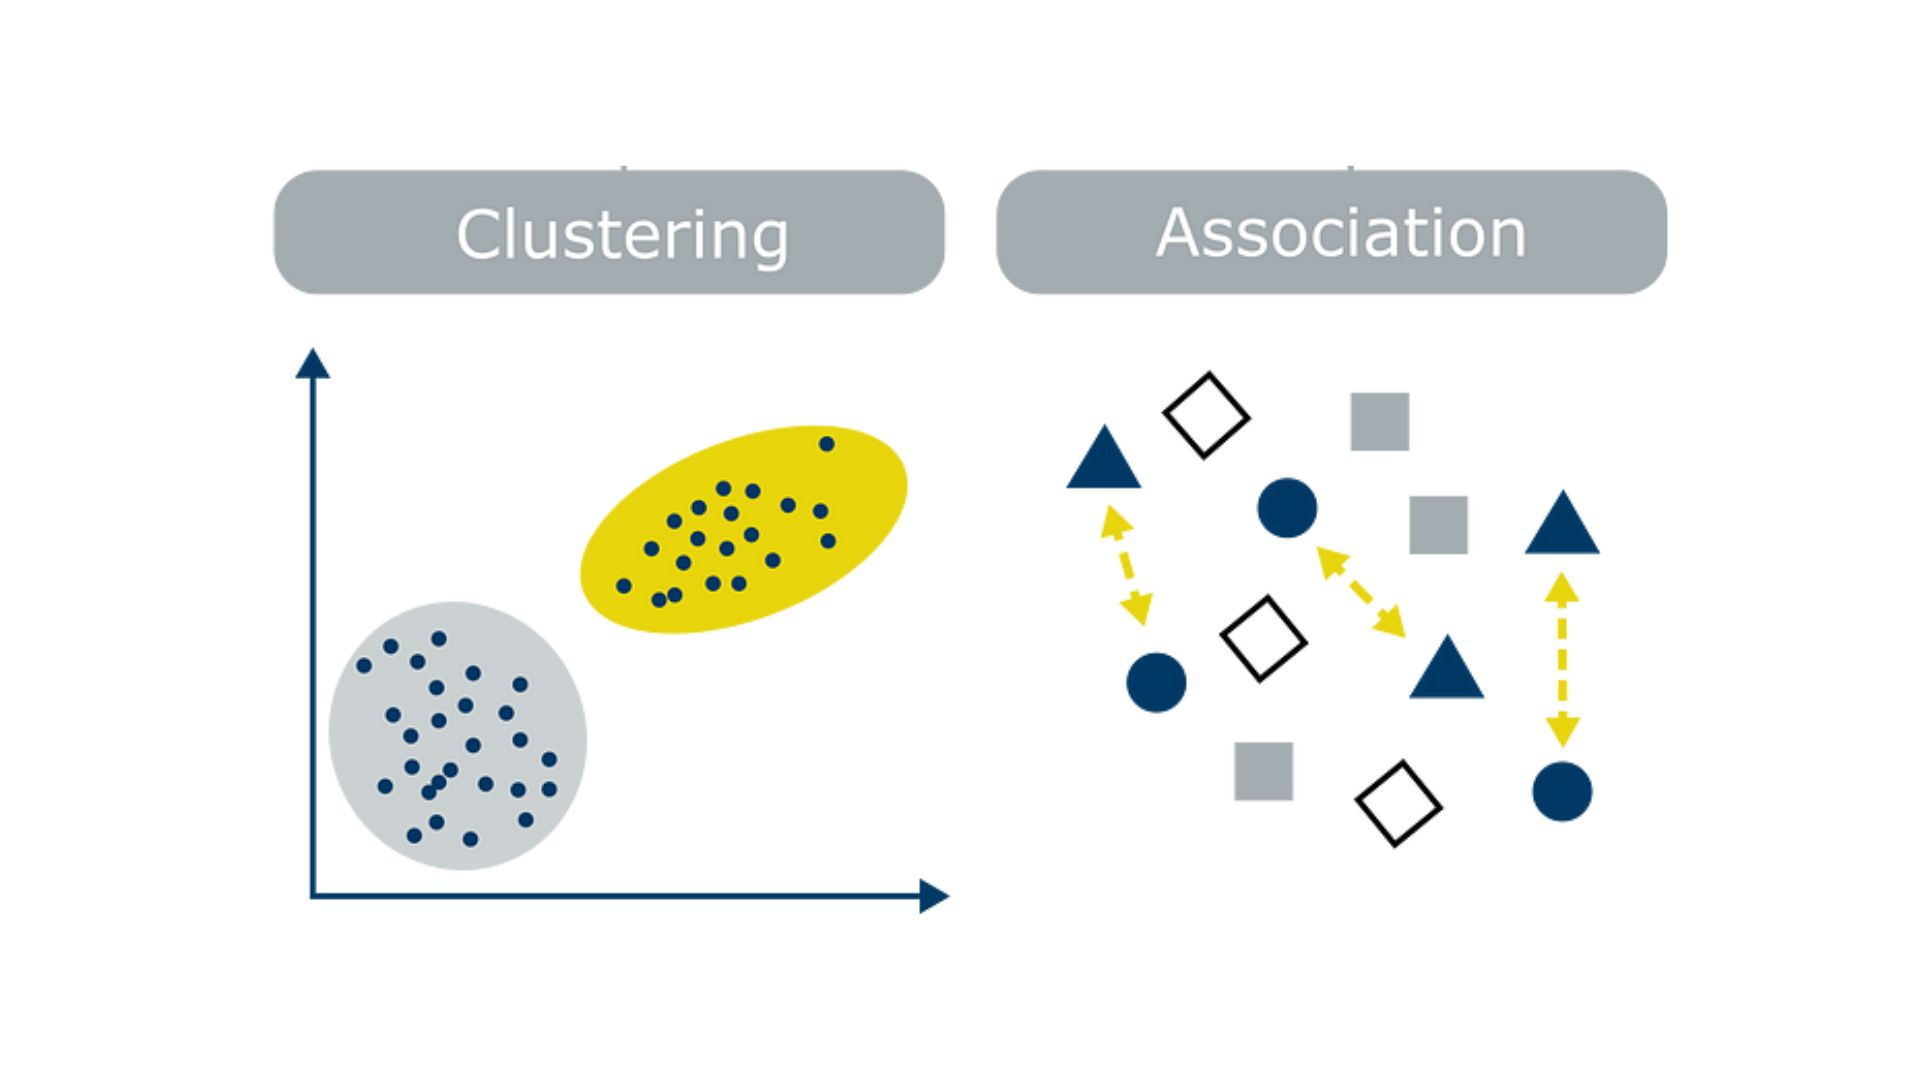

## Supervised Classification vs Unsupervised Clustering

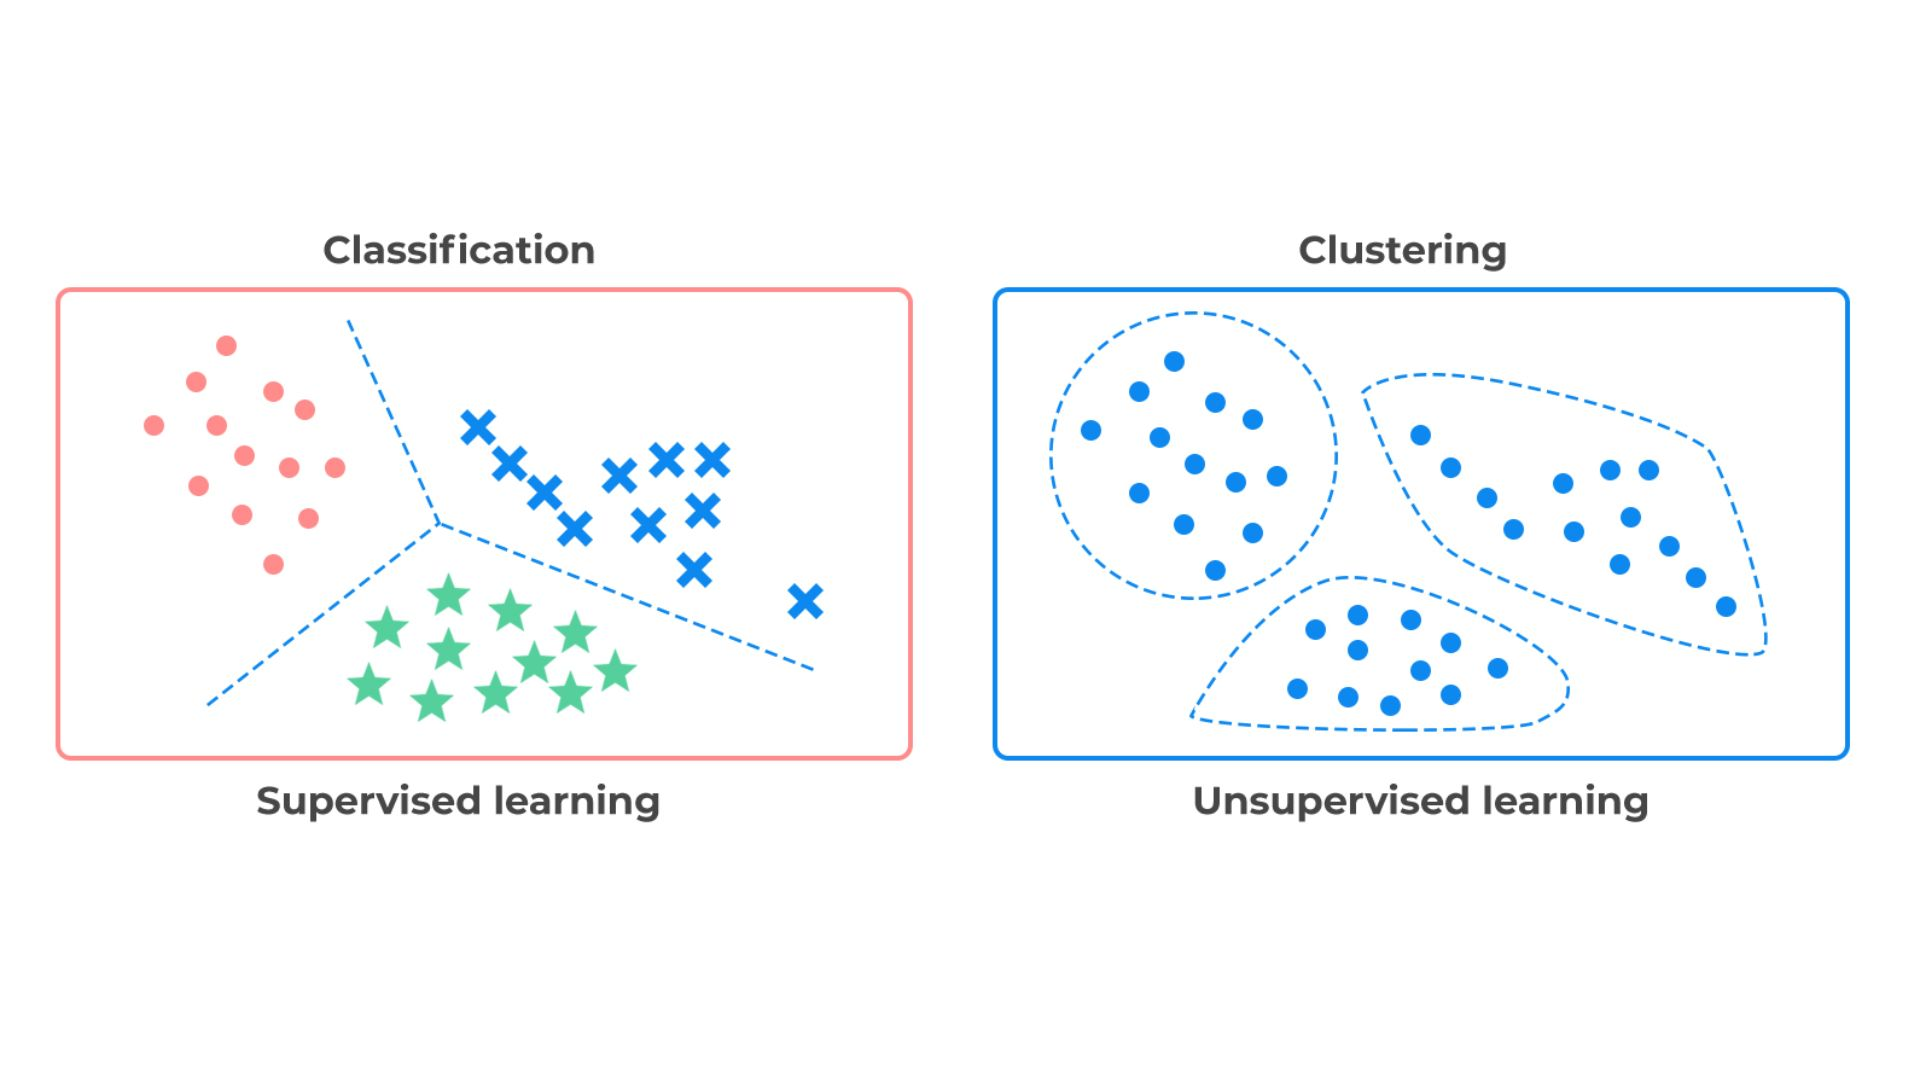






## Reinforcement learning

---


### It is a type of machine learning in which the agent learns by trial and error. The agent is given a reward for taking actions that lead to desired outcomes, and a penalty for taking actions that lead to undesired outcomes. The agent learns to take actions that maximize its rewards. For example.....


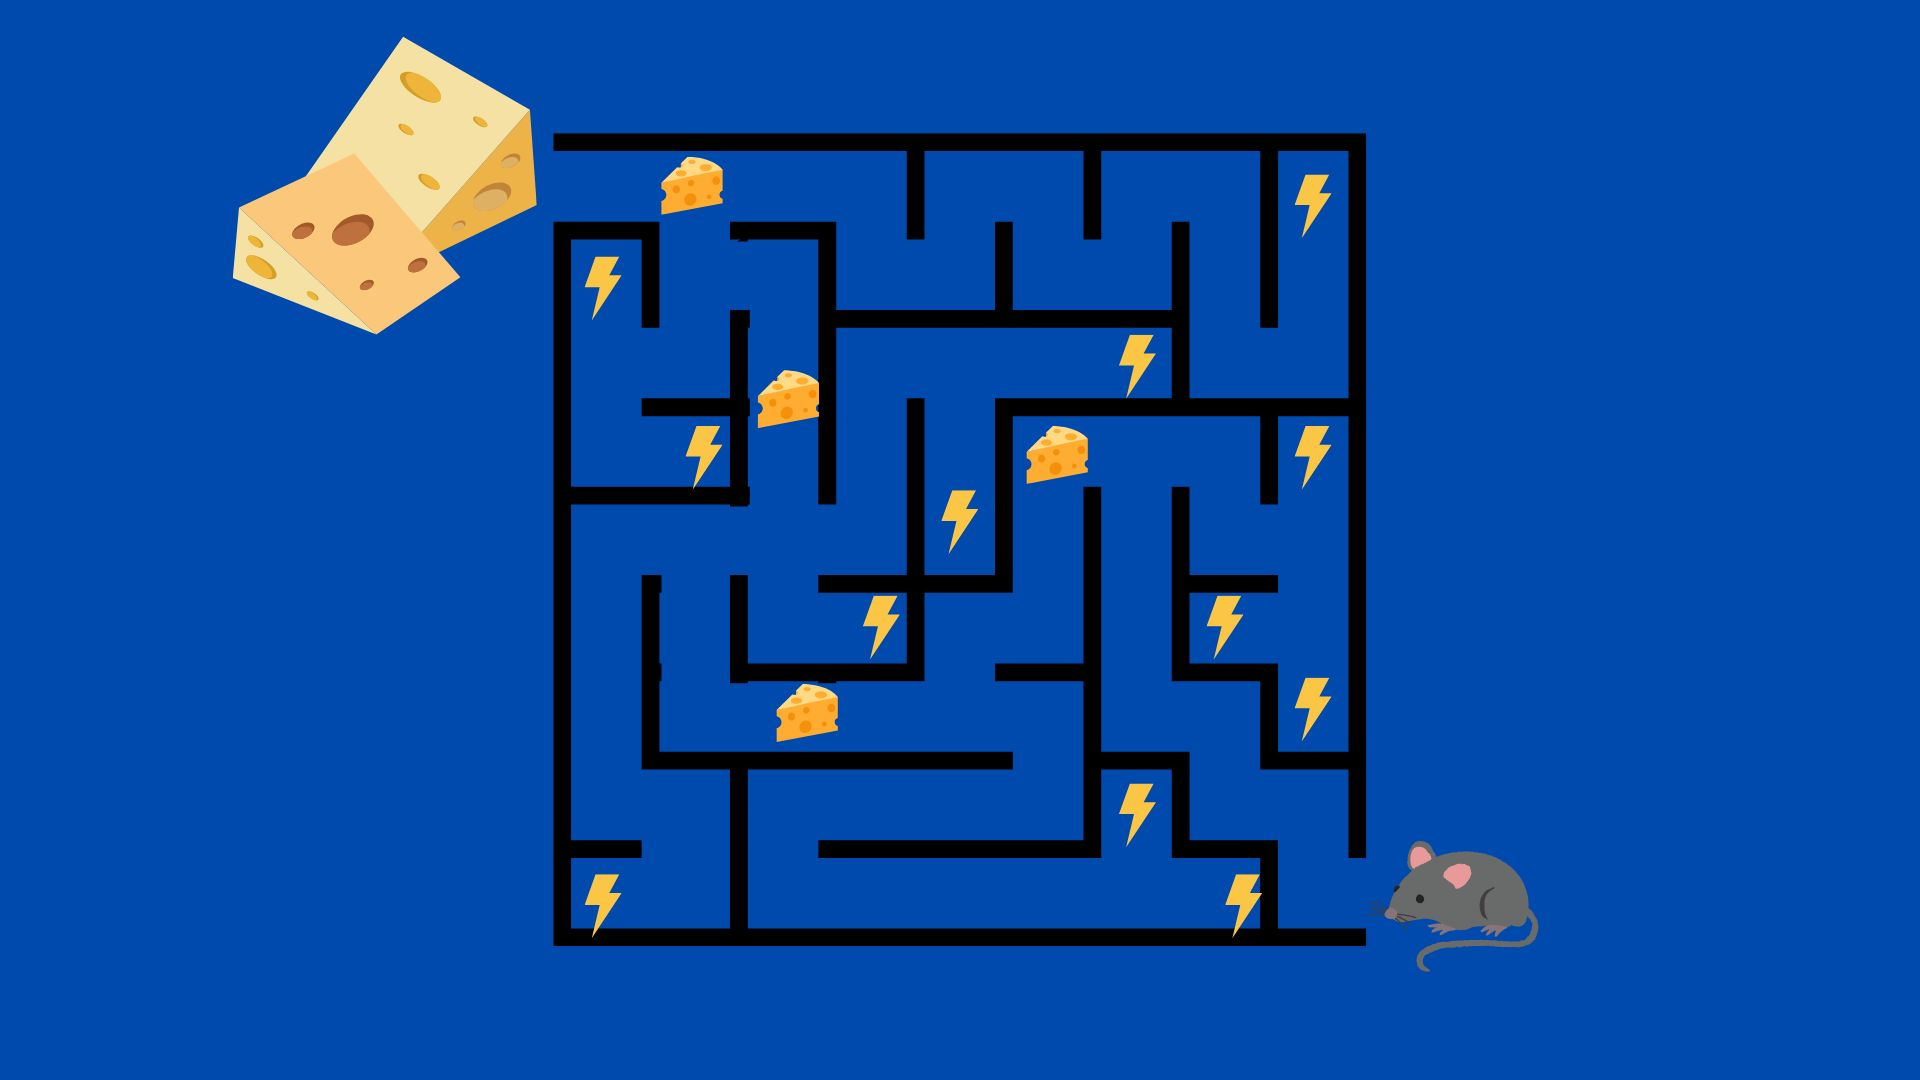

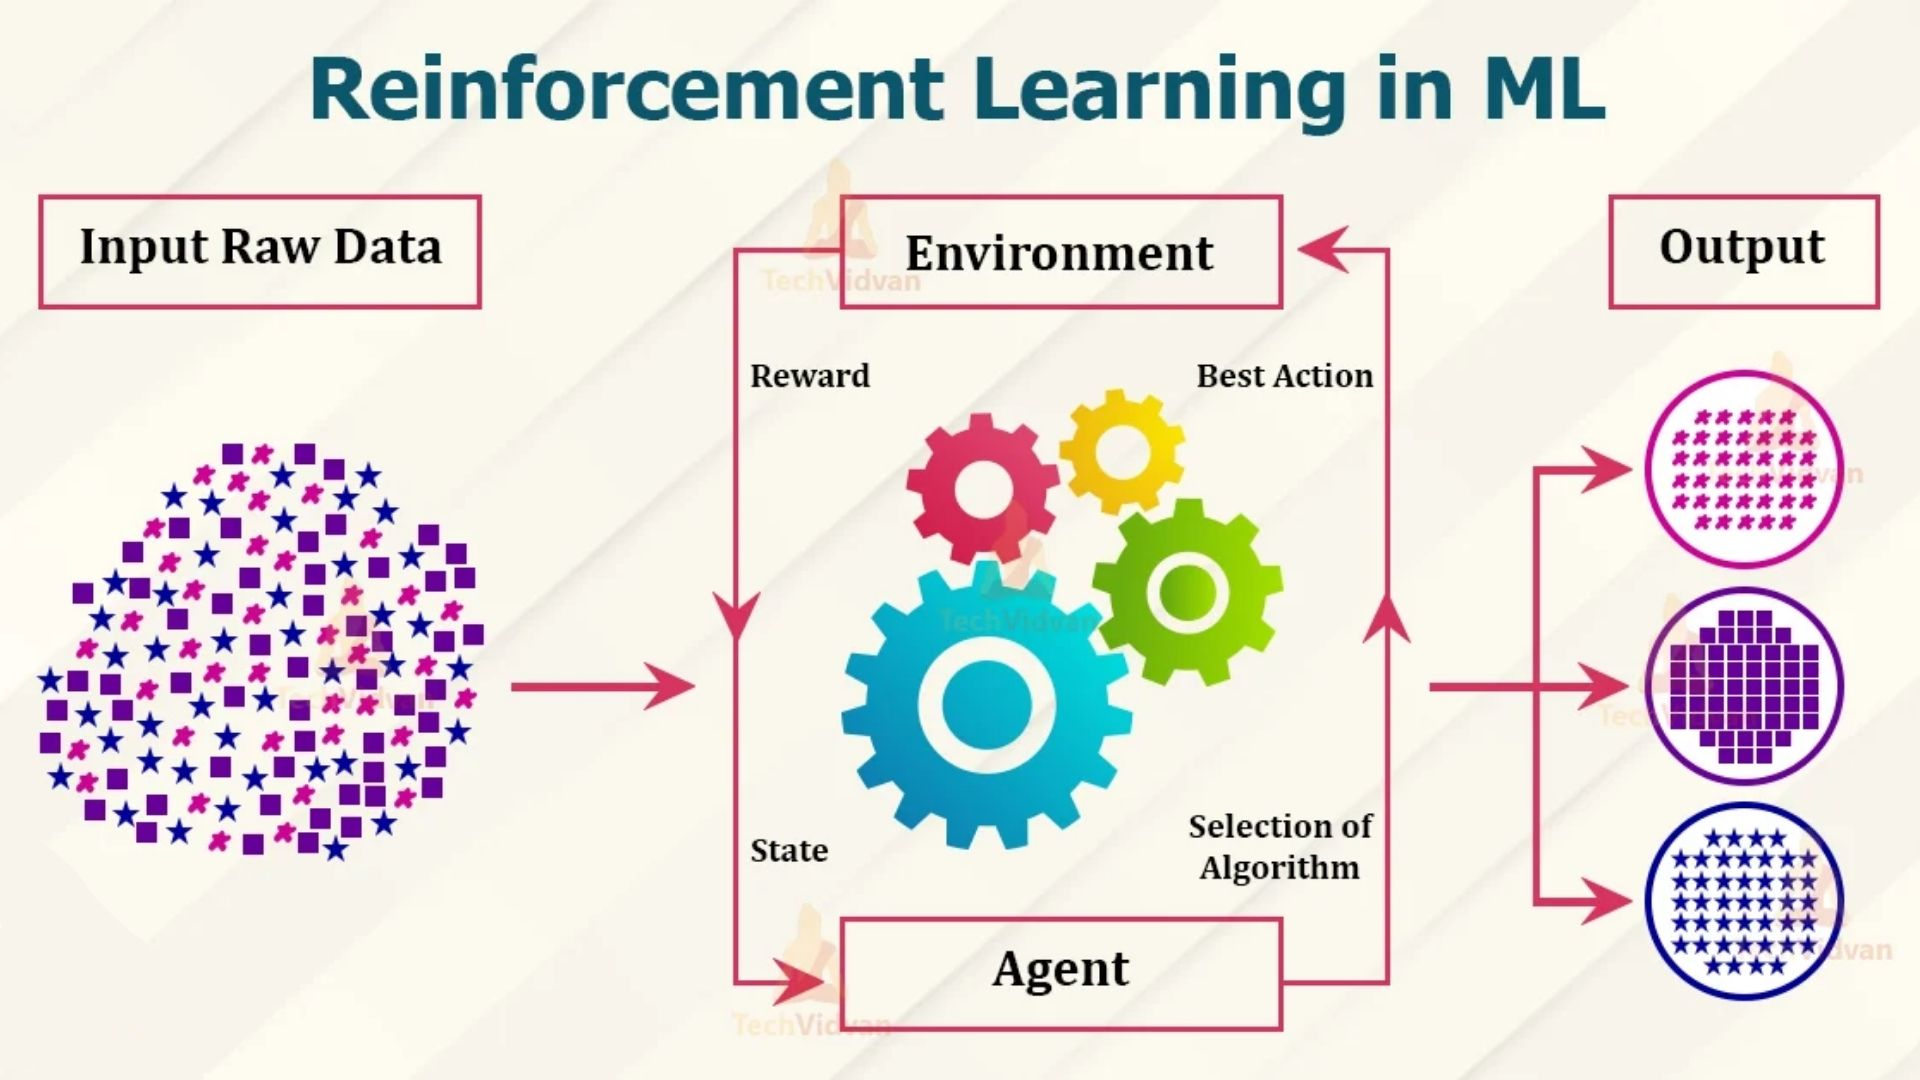

# Machine Learning Models Trained on the Entire Dataset

In [ ]:
X=df.iloc[:,2:-1]
X.drop(['FlightDate','DelayGroup','DepTime','DepDelayMinutes','ArrTime','ArrDelayMinutes','TaxiIn','TaxiOut','Cancelled','Diverted','Flight_Number_Marketing_Airline','OriginAirportID','DestAirportID'],axis=1,inplace=True)
y=df.iloc[:,-1:]

In [ ]:
X

,Airline,Origin,Dest,CRSDepTime,OriginCityName,OriginStateName,DestCityName,DestStateName,CRSArrTime,Year,Month
0,7,144,98,1133,129,5,89,5,1245,2022,4
1,15,96,123,1600,361,48,243,29,1744,2022,4
2,0,265,368,1820,65,12,348,21,2034,2022,4
3,0,72,264,1110,56,14,65,12,1234,2022,4
4,0,265,332,851,65,12,333,24,1039,2022,4
...,...,...,...,...,...,...,...,...,...,...,...
456147,13,265,83,1937,65,12,74,24,2109,2019,1
456148,13,96,123,750,361,48,243,29,909,2019,1
456150,13,265,46,1530,65,12,238,42,1712,2019,1
456151,13,265,106,1010,65,12,90,14,1138,2019,1


In [ ]:
y

,DelayOk
0,1
1,1
2,1
3,1
4,1
...,...
456147,1
456148,1
456150,1
456151,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(X_train, y_train)

y_pred = classifier2.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
pd.Series(y_pred).value_counts()

1    88549
dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     14727
           1       0.83      1.00      0.91     73822

    accuracy                           0.83     88549
   macro avg       0.42      0.50      0.45     88549
weighted avg       0.70      0.83      0.76     88549



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


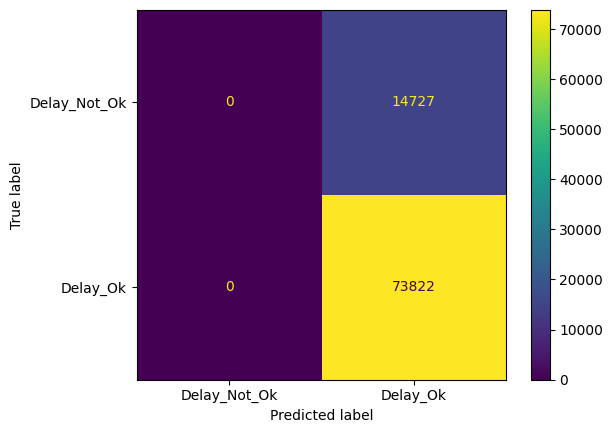

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Delay_Not_Ok', 'Delay_Ok'])

cm_display.plot()
plt.show()

In [ ]:
y_pred2=classifier2.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred2))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     58853
           1       0.83      1.00      0.91    295342

    accuracy                           0.83    354195
   macro avg       0.42      0.50      0.45    354195
weighted avg       0.70      0.83      0.76    354195



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier2=DecisionTreeClassifier(max_depth=20)
classifier2.fit(X_train,y_train)

y_pred = classifier2.predict(X_test)

In [ ]:
pd.Series(y_pred).value_counts()

1    78210
0    10339
dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.27      0.19      0.22     14727
           1       0.85      0.90      0.87     73822

    accuracy                           0.78     88549
   macro avg       0.56      0.54      0.55     88549
weighted avg       0.75      0.78      0.76     88549



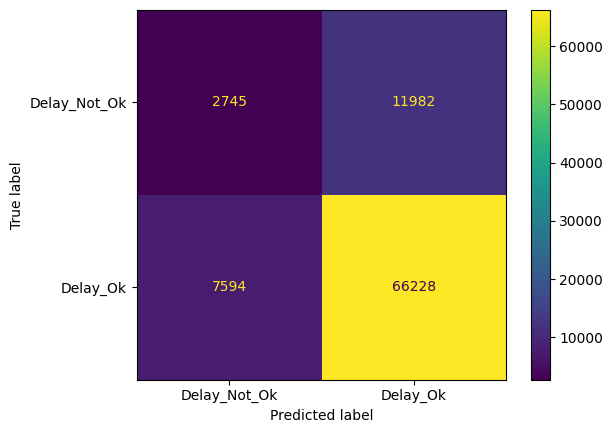

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Delay_Not_Ok', 'Delay_Ok'])

cm_display.plot()
plt.show()

In [ ]:
y_pred2=classifier2.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.56      0.67     58853
           1       0.92      0.98      0.95    295342

    accuracy                           0.91    354195
   macro avg       0.89      0.77      0.81    354195
weighted avg       0.91      0.91      0.90    354195



## XGBoost

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
classifier2=XGBClassifier()
classifier2.fit(X_train,y_train)

y_pred = classifier2.predict(X_test)

In [ ]:
pd.Series(y_pred).value_counts()

1    87639
0      910
dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.04      0.07     14727
           1       0.84      0.99      0.91     73822

    accuracy                           0.84     88549
   macro avg       0.70      0.51      0.49     88549
weighted avg       0.79      0.84      0.77     88549



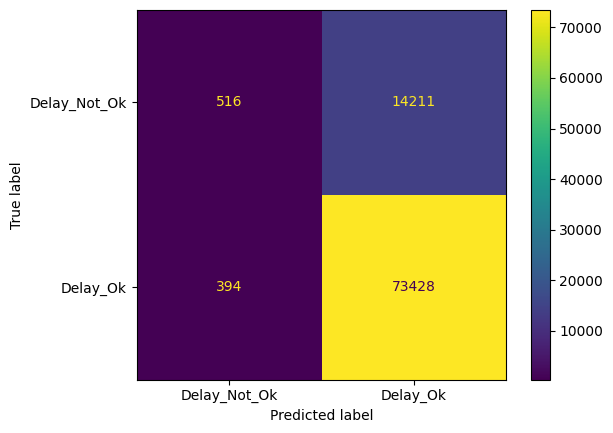

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Delay_Not_Ok', 'Delay_Ok'])

cm_display.plot()
plt.show()

In [ ]:
y_pred2=classifier2.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred2))

              precision    recall  f1-score   support

           0       0.68      0.05      0.09     58853
           1       0.84      1.00      0.91    295342

    accuracy                           0.84    354195
   macro avg       0.76      0.52      0.50    354195
weighted avg       0.81      0.84      0.77    354195



### This is the Model Performance on the entire dataset but during the EDA phase we noticed that 2020 had the most number of delays and cancellations all due to the COVID-19 pandemic so using it for training a flight delay prediction model may not result in Accurate predictions.

# Machine Learning Models trained on data excluding the year 2020

In [ ]:
new_df=df[df['Year']!=2020]

In [ ]:
len(new_df)

369103

In [ ]:
X=new_df.iloc[:,2:-1]
X.drop(['FlightDate','DelayGroup','DepTime','DepDelayMinutes','ArrTime','ArrDelayMinutes','TaxiIn','TaxiOut','Cancelled','Diverted','Flight_Number_Marketing_Airline','OriginAirportID','DestAirportID'],axis=1,inplace=True)
y=new_df.iloc[:,-1:]

In [ ]:
df_top

,FlightDate,Airline,Flight_Number_Marketing_Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes,DelayGroup,Year,Month,DelayOk
0,2022-01-04,Southwest Airlines Co.,1057,ATL,AUS,False,False,1440,1505.0,25.0,10397,"Atlanta, GA",Georgia,10423,"Austin, TX",Texas,11.0,7.0,1615,1632.0,17.0,Medium_Delay,2022,1,Bad
1,2022-01-04,Southwest Airlines Co.,1024,ATL,OMA,False,False,1250,1303.0,13.0,10397,"Atlanta, GA",Georgia,13871,"Omaha, NE",Nebraska,13.0,4.0,1415,1415.0,0.0,Small_Delay,2022,1,Good
2,2022-01-04,Southwest Airlines Co.,1113,AUS,HOU,False,False,640,701.0,21.0,10423,"Austin, TX",Texas,12191,"Houston, TX",Texas,8.0,3.0,735,744.0,9.0,Medium_Delay,2022,1,Bad
3,2022-01-04,Southwest Airlines Co.,269,BDL,DEN,False,False,730,726.0,0.0,10529,"Hartford, CT",Connecticut,11292,"Denver, CO",Colorado,15.0,4.0,1000,934.0,0.0,OnTime_Early,2022,1,Good
4,2022-01-04,Southwest Airlines Co.,1629,BNA,LAS,False,False,1455,1458.0,3.0,10693,"Nashville, TN",Tennessee,12889,"Las Vegas, NV",Nevada,13.0,5.0,1705,1651.0,0.0,Small_Delay,2022,1,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395739,2019-01-30,Mesa Airlines Inc.,6285,IAD,CLE,False,False,2200,2240.0,40.0,12264,"Washington, DC",Virginia,11042,"Cleveland, OH",Ohio,32.0,9.0,2322,17.0,55.0,Medium_Delay,2019,1,Bad
395740,2019-01-01,Mesa Airlines Inc.,6334,IAD,LGA,False,False,1705,1702.0,0.0,12264,"Washington, DC",Virginia,12953,"New York, NY",New York,21.0,7.0,1848,1809.0,0.0,OnTime_Early,2019,1,Good
395741,2019-01-27,Mesa Airlines Inc.,6242,DAY,IAH,False,False,630,630.0,0.0,11267,"Dayton, OH",Ohio,12266,"Houston, TX",Texas,42.0,7.0,830,838.0,8.0,OnTime_Early,2019,1,Good
395742,2019-08-01,Mesa Airlines Inc.,6260,LGA,IAD,False,False,1020,1012.0,0.0,12953,"New York, NY",New York,12264,"Washington, DC",Virginia,31.0,5.0,1149,1136.0,0.0,OnTime_Early,2019,8,Good


In [ ]:
X

,Airline,Origin,Dest,CRSDepTime,OriginCityName,OriginStateName,DestCityName,DestStateName,CRSArrTime,Year,Month
0,7,144,98,1133,129,5,89,5,1245,2022,4
1,15,96,123,1600,361,48,243,29,1744,2022,4
2,0,265,368,1820,65,12,348,21,2034,2022,4
3,0,72,264,1110,56,14,65,12,1234,2022,4
4,0,265,332,851,65,12,333,24,1039,2022,4
...,...,...,...,...,...,...,...,...,...,...,...
456147,13,265,83,1937,65,12,74,24,2109,2019,1
456148,13,96,123,750,361,48,243,29,909,2019,10
456150,13,265,46,1530,65,12,238,42,1712,2019,4
456151,13,265,106,1010,65,12,90,14,1138,2019,1


In [ ]:
y

,DelayOk
0,1
1,1
2,1
3,1
4,1
...,...
456147,1
456148,1
456150,1
456151,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(X_train, y_train)

y_pred = classifier2.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
pd.Series(y_pred).value_counts()

1    73821
dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     13361
           1       0.82      1.00      0.90     60460

    accuracy                           0.82     73821
   macro avg       0.41      0.50      0.45     73821
weighted avg       0.67      0.82      0.74     73821



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


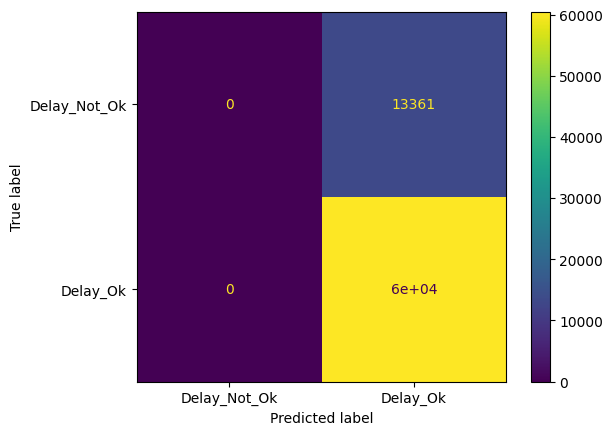

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Delay_Not_Ok', 'Delay_Ok'])

cm_display.plot()
plt.show()

In [ ]:
y_pred2=classifier2.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred2))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     53808
           1       0.82      1.00      0.90    241474

    accuracy                           0.82    295282
   macro avg       0.41      0.50      0.45    295282
weighted avg       0.67      0.82      0.74    295282



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier2=DecisionTreeClassifier(max_depth=20)
classifier2.fit(X_train,y_train)

y_pred = classifier2.predict(X_test)

In [ ]:
pd.Series(y_pred).value_counts()

1    64466
0     9355
dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.26      0.18      0.21     13361
           1       0.83      0.89      0.86     60460

    accuracy                           0.76     73821
   macro avg       0.54      0.53      0.54     73821
weighted avg       0.73      0.76      0.74     73821



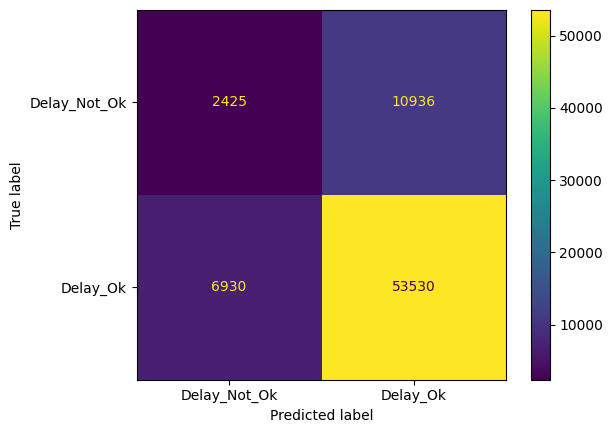

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Delay_Not_Ok', 'Delay_Ok'])

cm_display.plot()
plt.show()

In [ ]:
y_pred2=classifier2.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.57      0.69     53808
           1       0.91      0.98      0.94    241474

    accuracy                           0.91    295282
   macro avg       0.89      0.77      0.82    295282
weighted avg       0.90      0.91      0.90    295282



## XGBoost

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
classifier2=XGBClassifier()
classifier2.fit(X_train,y_train)

y_pred = classifier2.predict(X_test)

In [ ]:
pd.Series(y_pred).value_counts()

1    72851
0      970
dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.04      0.07     13361
           1       0.82      0.99      0.90     60460

    accuracy                           0.82     73821
   macro avg       0.68      0.52      0.49     73821
weighted avg       0.77      0.82      0.75     73821



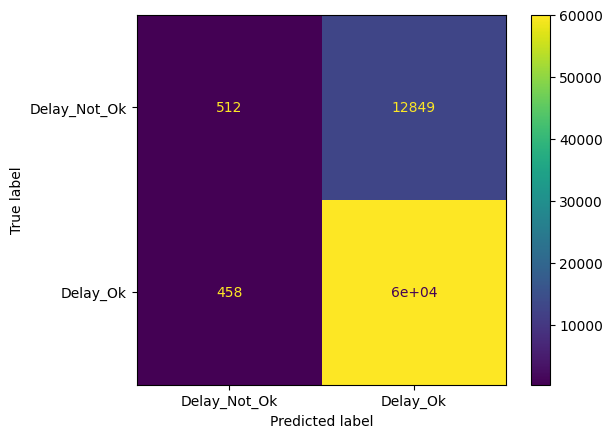

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Delay_Not_Ok', 'Delay_Ok'])

cm_display.plot()
plt.show()

In [ ]:
y_pred2=classifier2.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred2))

              precision    recall  f1-score   support

           0       0.69      0.05      0.10     53808
           1       0.82      0.99      0.90    241474

    accuracy                           0.82    295282
   macro avg       0.76      0.52      0.50    295282
weighted avg       0.80      0.82      0.76    295282



In [ ]:
from scipy.stats import randint
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist



param_dist={"learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]}

# Instantiate a Decision Tree classifier: tree
tree = XGBClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = rf_random = RandomizedSearchCV(estimator = tree, param_distributions = param_dist, n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Tuned Decision Tree Parameters: {'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 0.7}
Best score is 0.8189561170524808


# Conclusion

### The accuracy of the models trained on the entire dataset may be marginally higher but we need to look deeper to really understand why models trained on the dataset excluding 2020 are actually far better.
### To begin with, take a look at the False Negatives and False Positives of XGBoost using the entire dataset vs using the dataset without the year 2020.
### Ideally a higher number of False Negatives won't harm us as if the model suggests that there would be a flight delay and in reality there isn't, the person won't miss the connecting flight or meeting.
### We need as low as possible number of False Positives as if the model says the flight will not be delayed but if in reality it gets delayed, the person may miss the connecting Flight.
### We hence see that the XGBoost model trained on the dataset without the year 2020, seems to have the best balance of False Negatives and False positives while still maintaining a decent accuracy of 82%. So we choose this model as our final model.

# Model Deployment

In [ ]:
X.columns

Index(['Airline', 'Origin', 'Dest', 'CRSDepTime', 'OriginCityName',
       'OriginStateName', 'DestCityName', 'DestStateName', 'CRSArrTime',
       'Year', 'Month'],
      dtype='object')

In [ ]:
classifier2.predict(np.array([[7,144,98,1133,129,5,89,5,1245,2022,4]]))[0]

1

In [ ]:
import pandas as pd

link = f'https://drive.google.com/uc?id=1StfOm_hCyVhyrvRhUCH5npVDY63hg766'
df2 = pd.read_csv(link)

In [ ]:
airline_list=list(df2['Airline'].unique())
origin_list=list(df2['Origin'].unique())
dest_list=list(df2['Dest'].unique())
origin_city_list=list(df2['OriginCityName'].unique())
origin_state_list=list(df2['OriginStateName'].unique())
dest_city_list=list(df2['DestCityName'].unique())
dest_state_list=list(df2['DestStateName'].unique())
month_list=list(np.arange(1,13))
year_list=list(np.arange(2018, 2026))

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import re
import re

def time(input_str):
    # Remove non-numeric characters except for "am"
    cleaned_str = re.sub(r'[^0-9aApPmM]', '', input_str)

    # Handle "am" or "pm" if present
    if cleaned_str.lower().endswith('am') or cleaned_str.lower().endswith('pm'):
        cleaned_str = cleaned_str[:-2]

    return int(cleaned_str)
def predictor(airline,origin,dest,dept_time,origin_city,origin_state,dest_city,dest_state,arr_time,month,year):
    pred=classifier2.predict(np.array([[le1.transform([airline])[0],le2.transform([origin])[0],le3.transform([dest])[0],time(dept_time),le6.transform([origin_city])[0],le8.transform([origin_state])[0],le7.transform([dest_city])[0],le9.transform([dest_state])[0],time(arr_time),int(month),int(year)]]))
    if(pred[0]==1):
      result="Your flight will not be delayed or may have a small delay < 15 minutes max"
    else:
      result="Your flight may be delayed for a period longer than 15 minutes or may get cancelled"
    return result


input_list=[gr.Dropdown(airline_list, label="Airline"),
            gr.Dropdown(origin_list, label="Origin Airport Code"),
            gr.Dropdown(dest_list, label="Destination Airport Code"),
            gr.Textbox(label="Departure Time", placeholder="Please input time in 24 hour format"),
            gr.Dropdown(origin_city_list, label="Origin City Name"),
            gr.Dropdown(origin_state_list, label="Origin State Name"),
            gr.Dropdown(dest_city_list, label="Dest City Name"),
            gr.Dropdown(dest_state_list, label="Dest State Name"),
            gr.Textbox(label="Arrival Time", placeholder="Please input time in 24 hour format"),
            gr.Dropdown(month_list, label="Month"),
            gr.Dropdown(year_list, label="Year"),
            ]
app = gr.Interface(fn = predictor, title="Airline Delay Predictor", inputs=input_list, outputs="text")
app.queue().launch(share=True,debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://f4fb95380dc7926447.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://f4fb95380dc7926447.gradio.live
